# **STUDENTS DEPRESSION DATASET**

 **NAME: ALEN THOMAS**


## **PROBLEM STATEMENT**


**Predict whether a student is depressed based on their survey responses.**

# **OBJECTIVES**

To analyze the factors contributing to student depression.

To identify patterns or trends in student mental health data.

To build a model that predicts whether a student is depressed or not.

To visualize key insights using graphs and charts.

To provide recommendations for improving student mental well-being.

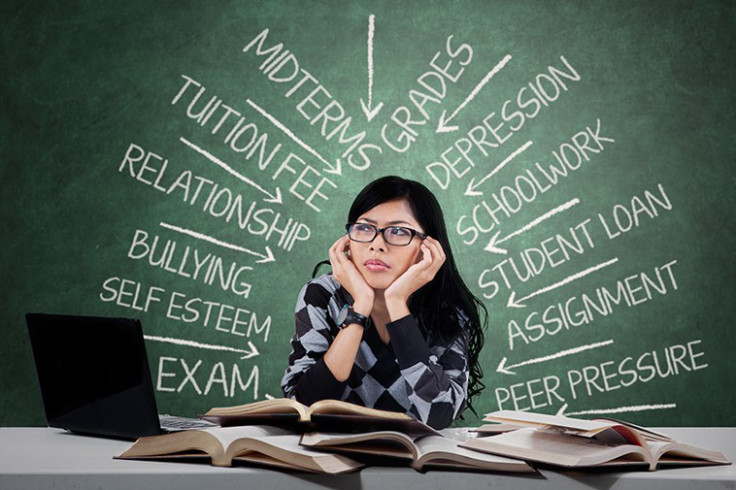

**IMPORT NECESSARY LIBRARIES**

In [ ]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

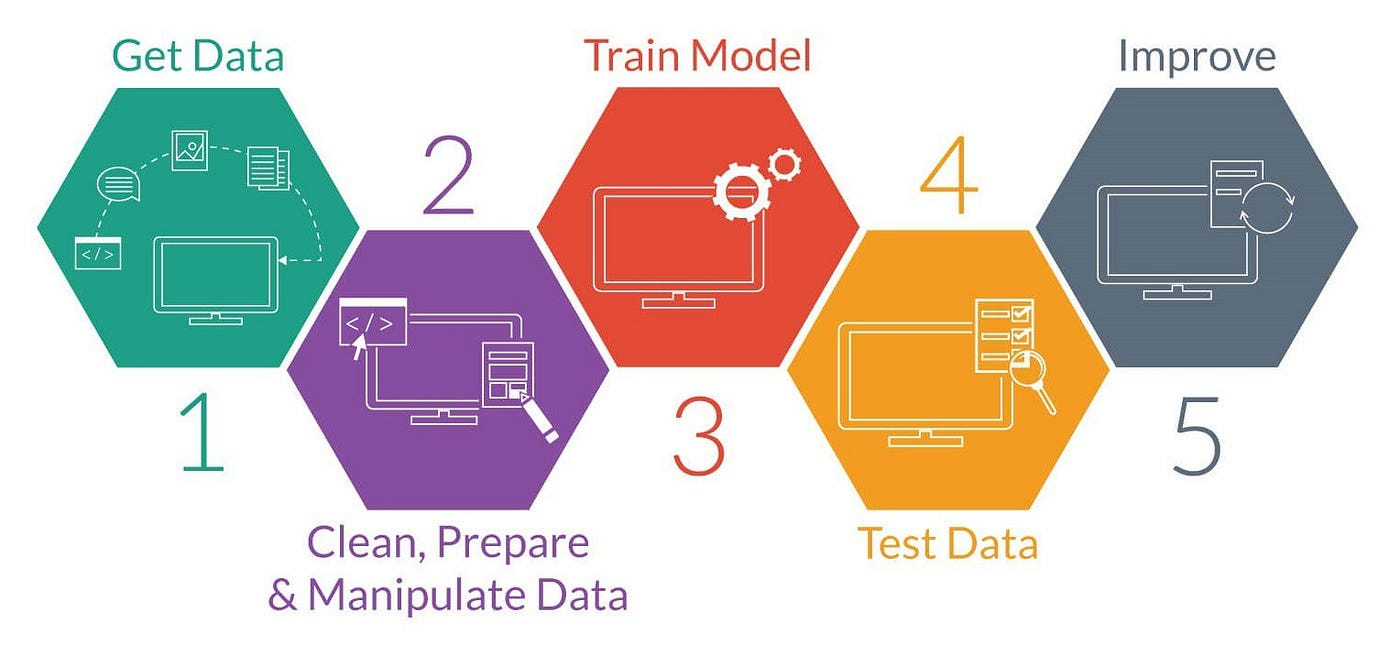

***GET DATASET***

In [ ]:
data=pd.read_csv('/content/student_depression_dataset.csv')

In [ ]:
df=pd.DataFrame(data)

**INFO,SHAPE,DESCRIBE,COLUMNS,HEAD**

In [ ]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
df.head(6)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.shape

(27901, 18)

 **DATA CLEANING**


In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.dropna()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
y=df['Depression']
y

,Depression
0,1
1,0
2,0
3,1
4,0
...,...
27896,0
27897,0
27898,0
27899,1


In [ ]:
x=df.drop('Depression',axis=1)

In [ ]:
x.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

#### **CONVERT CATEGORICAL INTO NUMERICAL**
BY USING ENCODING

ONE HOT ENCODER



In [ ]:
df_pandas_encoded=pd.get_dummies(df,columns=['Gender','City','Profession','Degree','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?','Financial Stress','Family History of Mental Illness'],drop_first=True)

In [ ]:
encoder=OneHotEncoder(sparse_output=False)

In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Financial Stress',
 'Family History of Mental Illness']

In [ ]:
one_hot_encoded=encoder.fit_transform(df[categorical_columns])

In [ ]:
one_hot_encoded_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),one_hot_encoded_df],axis=1)

In [ ]:
df1=df_sklearn_encoded

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 124 entries, id to Family History of Mental Illness_Yes
dtypes: float64(122), int64(2)
memory usage: 26.4 MB


### **HANDLING OUTLIERS**

In [ ]:
#handling outliers
num_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()
num_columns

['id',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Depression',
 'Gender_Female',
 'Gender_Male',
 "City_'Less Delhi'",
 "City_'Less than 5 Kalyan'",
 'City_3.0',
 'City_Agra',
 'City_Ahmedabad',
 'City_Bangalore',
 'City_Bhavna',
 'City_Bhopal',
 'City_Chennai',
 'City_City',
 'City_Delhi',
 'City_Faridabad',
 'City_Gaurav',
 'City_Ghaziabad',
 'City_Harsh',
 'City_Harsha',
 'City_Hyderabad',
 'City_Indore',
 'City_Jaipur',
 'City_Kalyan',
 'City_Kanpur',
 'City_Khaziabad',
 'City_Kibara',
 'City_Kolkata',
 'City_Lucknow',
 'City_Ludhiana',
 'City_M.Com',
 'City_M.Tech',
 'City_ME',
 'City_Meerut',
 'City_Mihir',
 'City_Mira',
 'City_Mumbai',
 'City_Nagpur',
 'City_Nalini',
 'City_Nalyan',
 'City_Nandini',
 'City_Nashik',
 'City_Patna',
 'City_Pune',
 'City_Rajkot',
 'City_Rashi',
 'City_Reyansh',
 'City_Saanvi',
 'City_Srinagar',
 'City_Surat',
 'City_Thane',
 'City_Vaanya',
 'City_Vadodara',
 'City_Varan

In [ ]:
def handling_outliers(df1):
  for col in df.select_dtypes(include=['int64','float64']).columns:
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-1.5*IQR
    Upper_bound=Q3+1.5*IQR
    df1[col]=df1[col].apply(lambda x:Lower_bound if x<Lower_bound else Upper_bound if x>Upper_bound else x)
  return df1


## **Gain insights into  data distribution ,realtionships and potential**
**VISUALIZATION**

<Axes: >

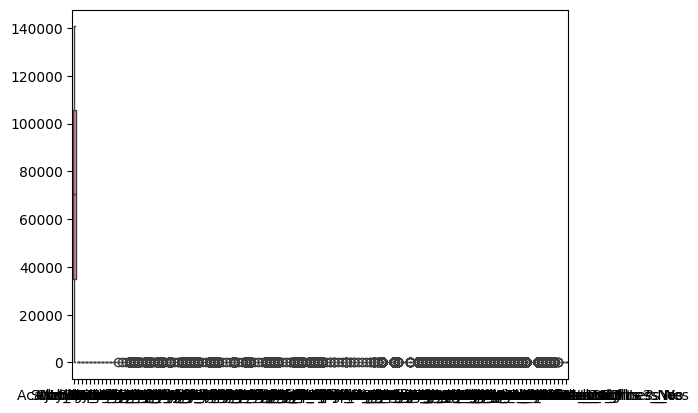

In [ ]:
df1=handling_outliers(df1)
df1.head()
sns.boxplot(df1)

**BOX PLOT**

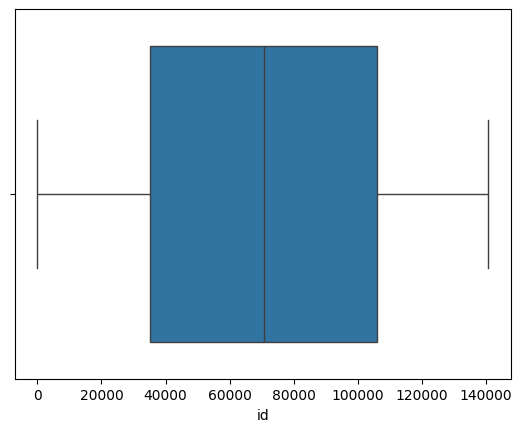

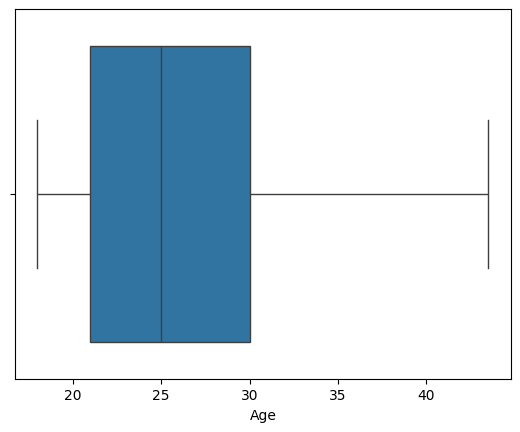

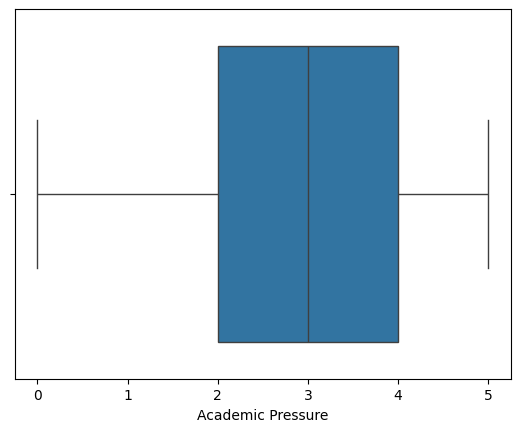

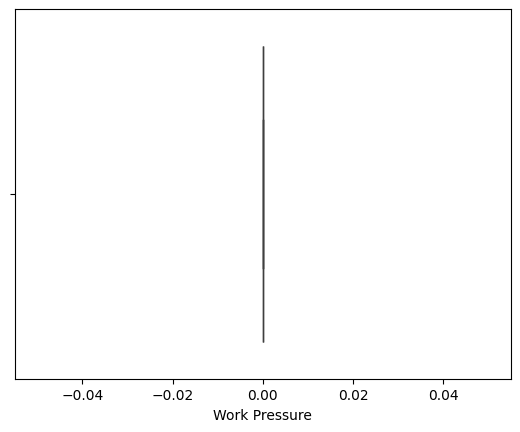

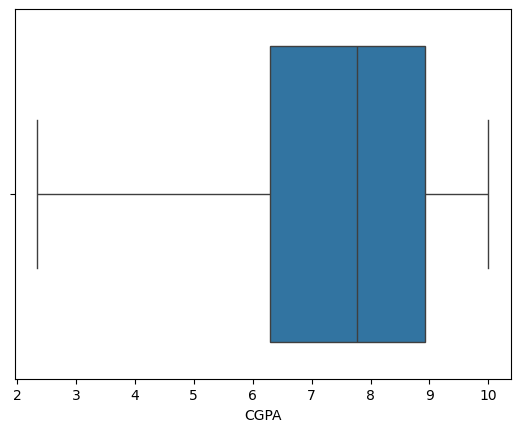

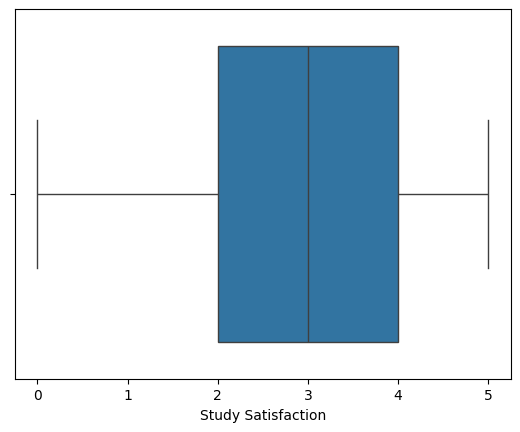

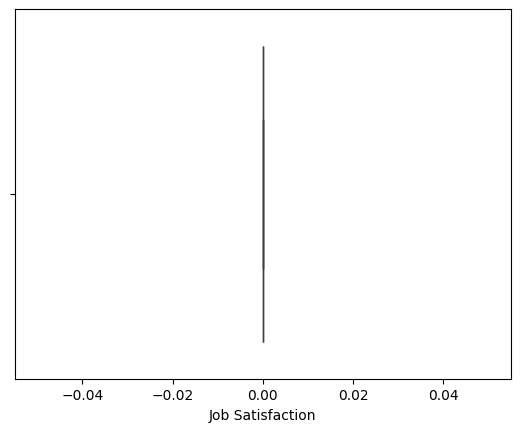

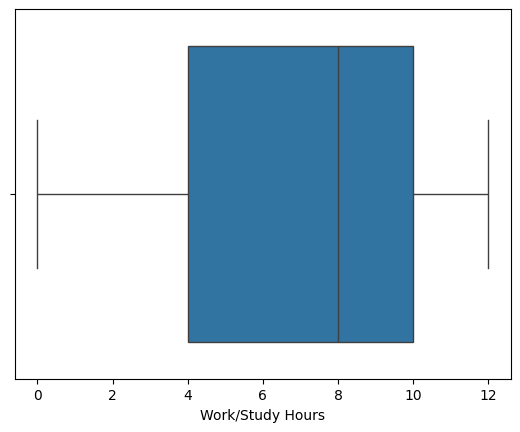

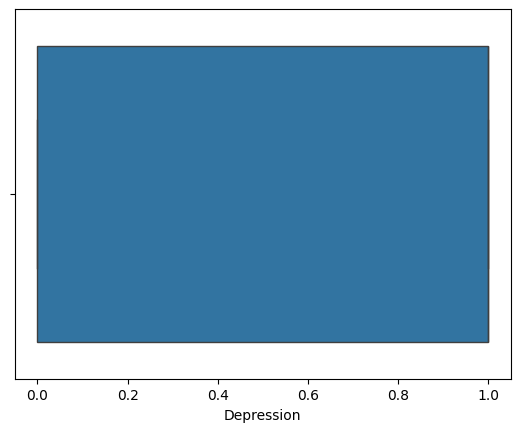

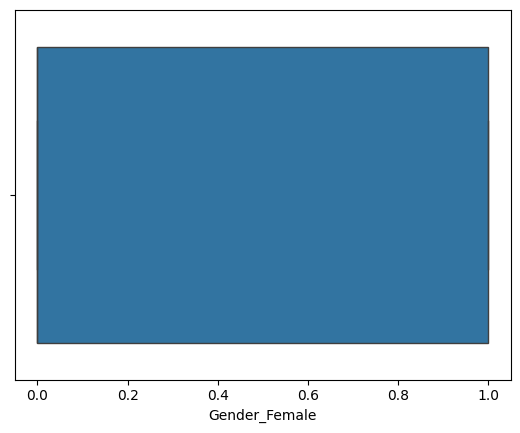

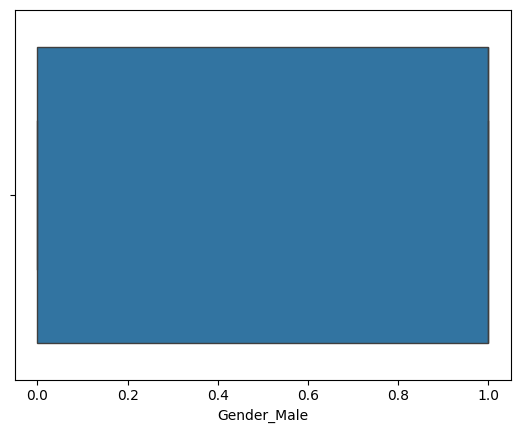

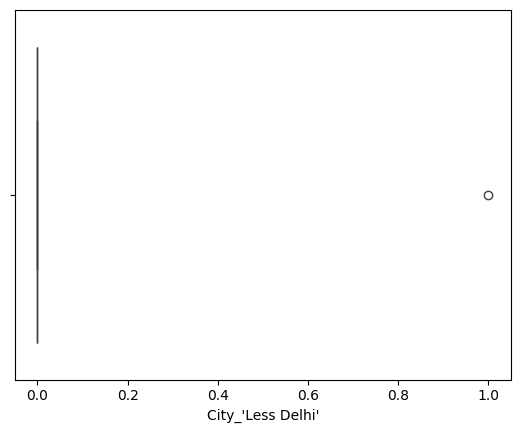

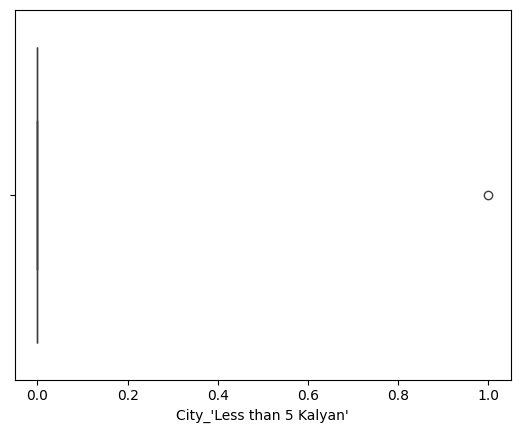

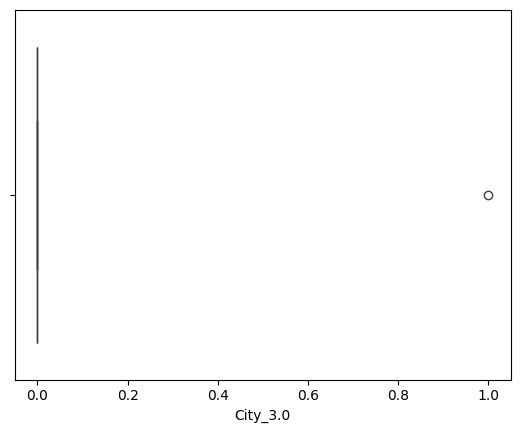

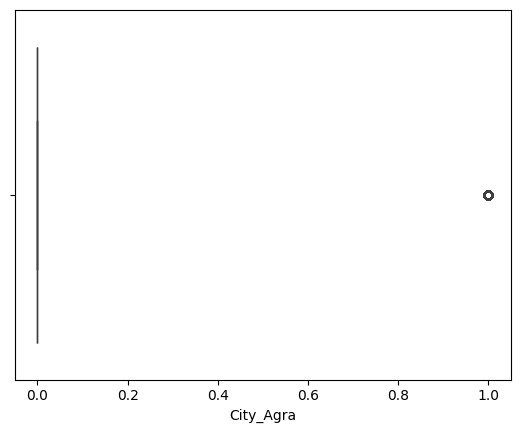

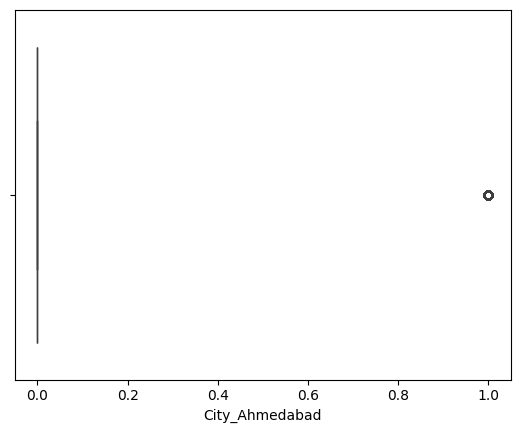

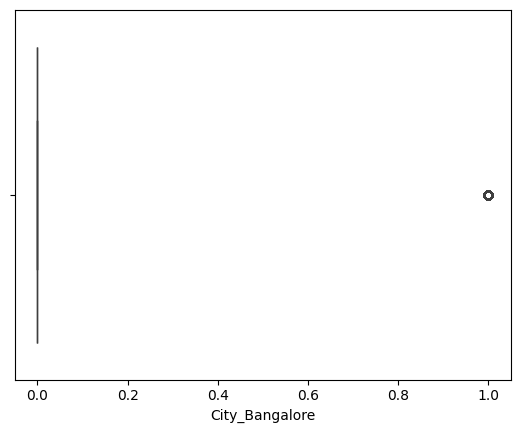

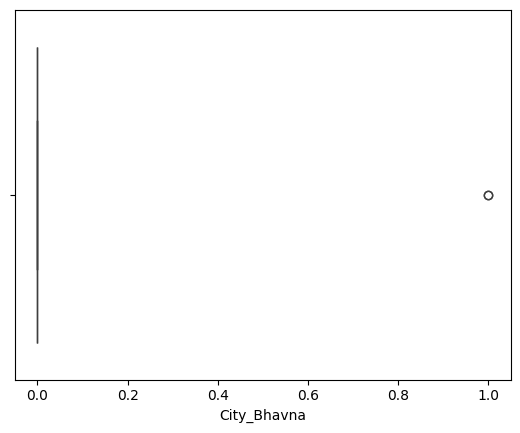

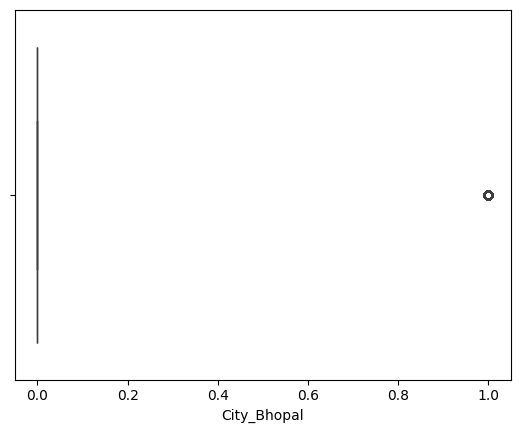

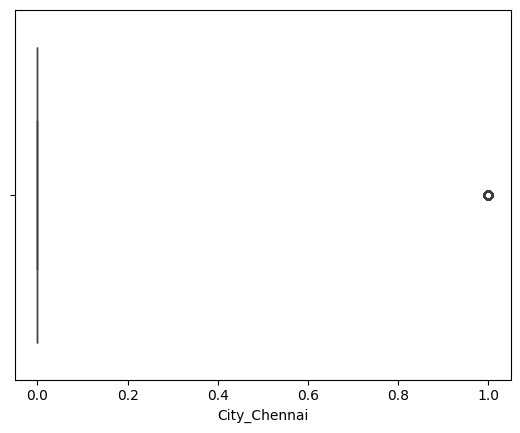

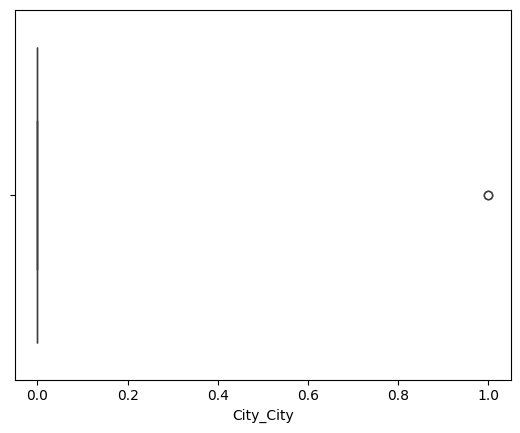

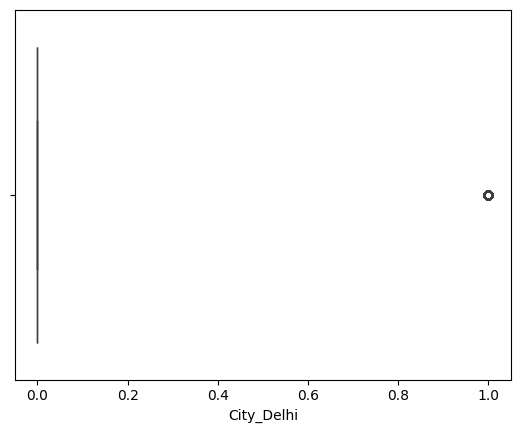

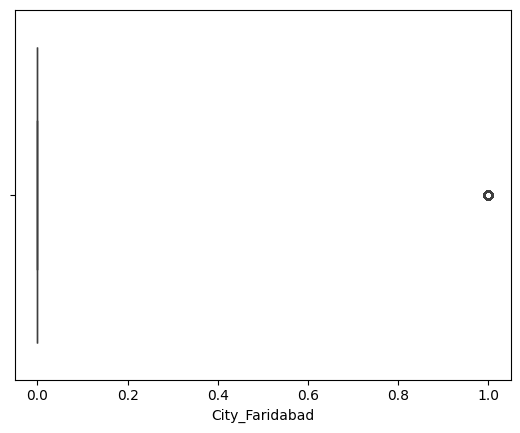

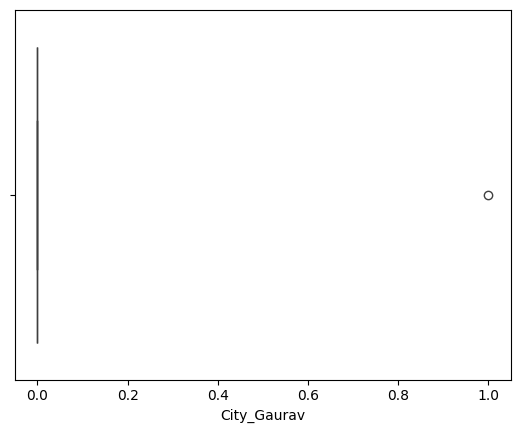

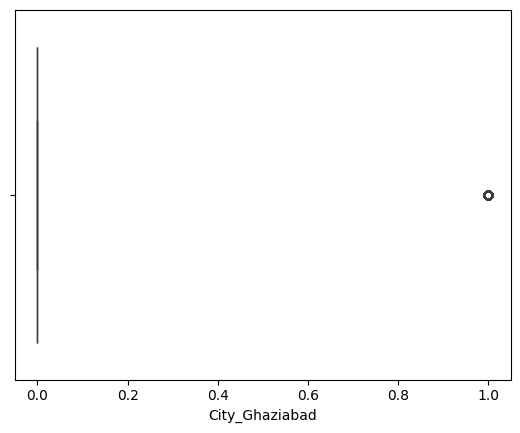

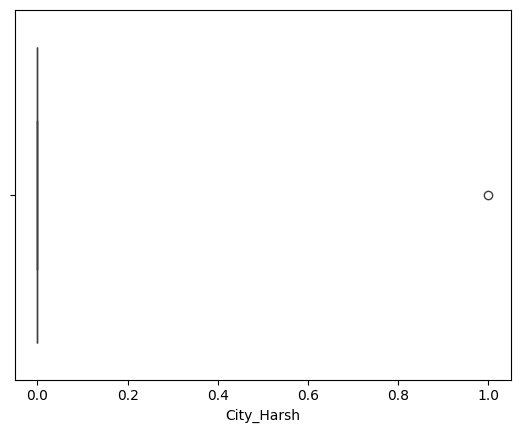

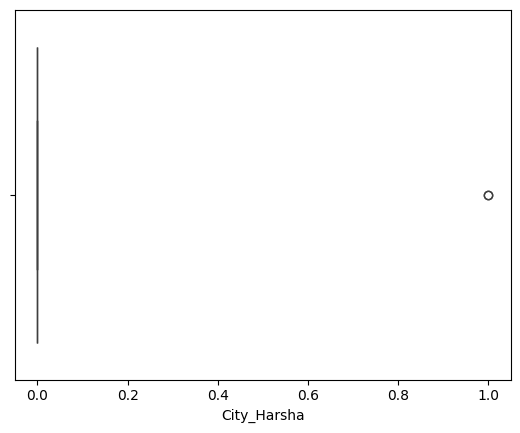

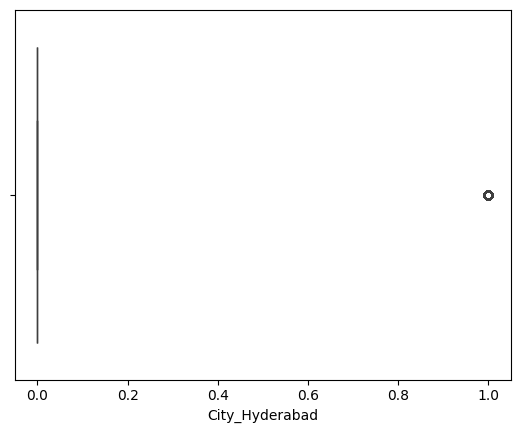

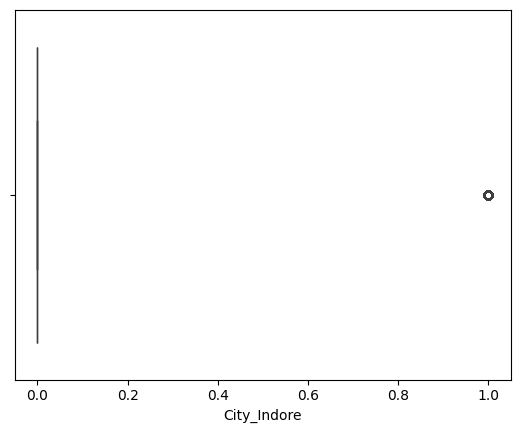

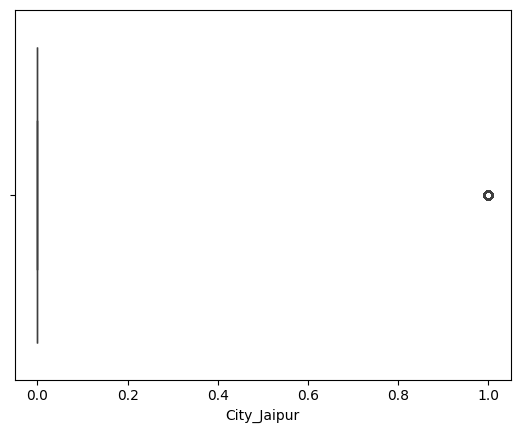

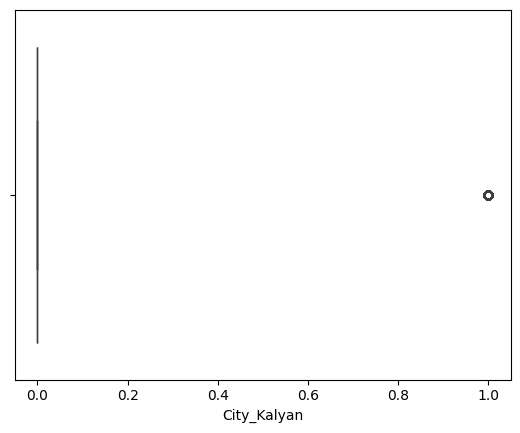

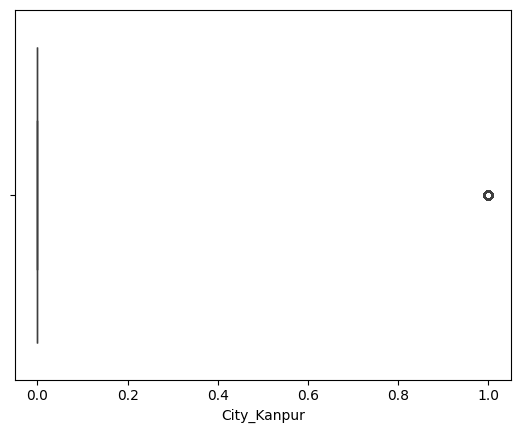

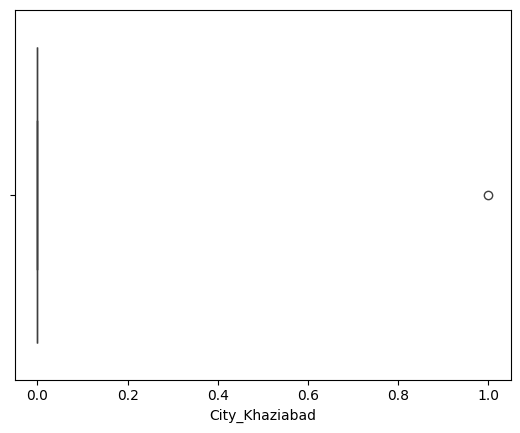

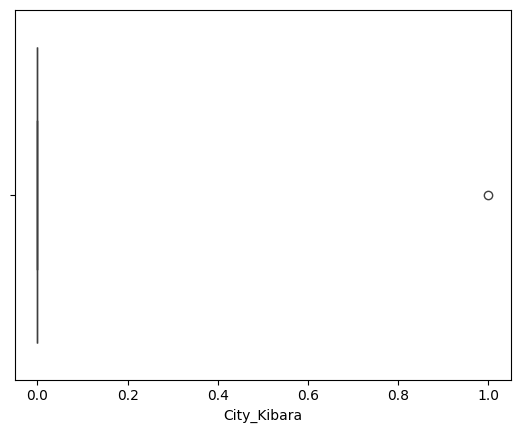

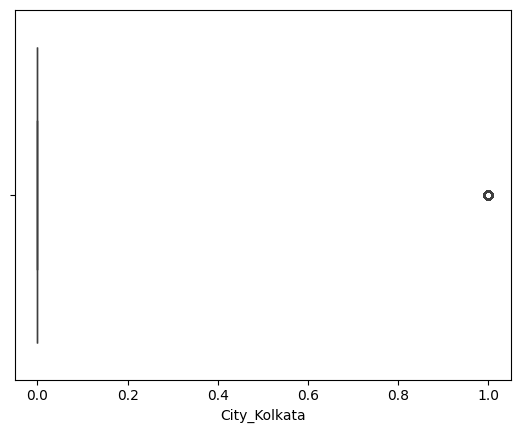

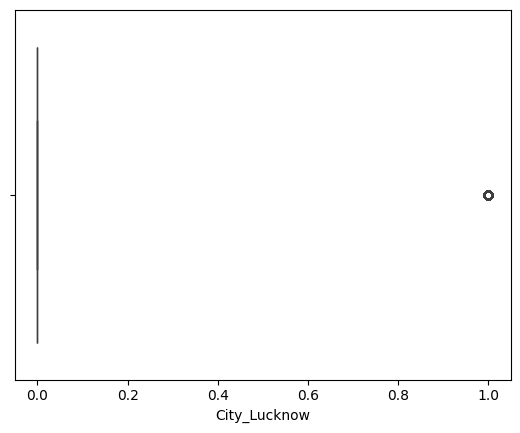

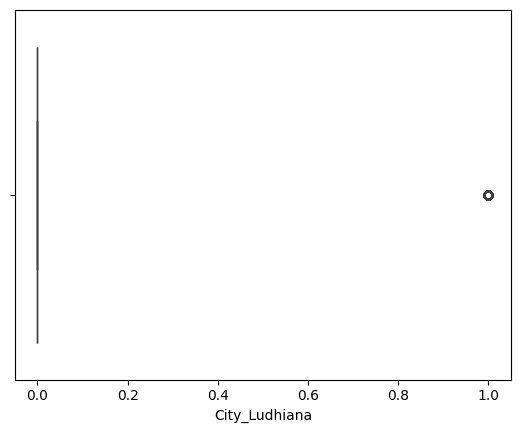

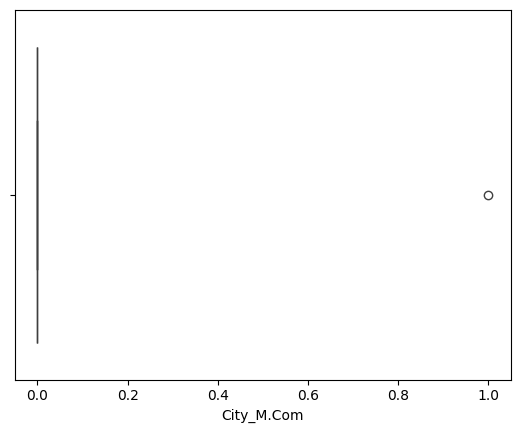

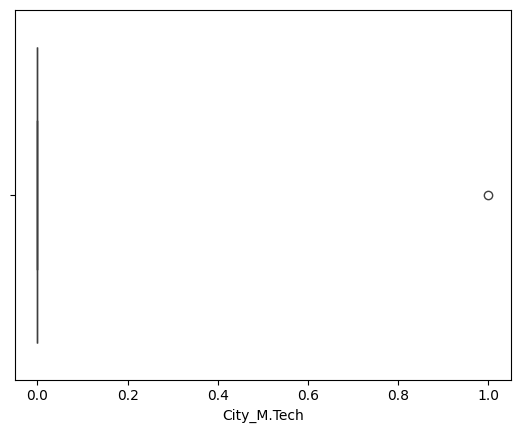

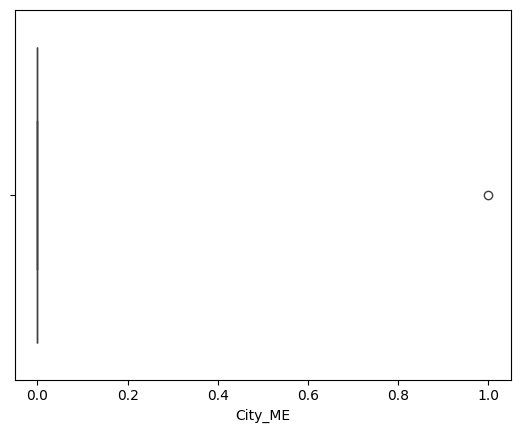

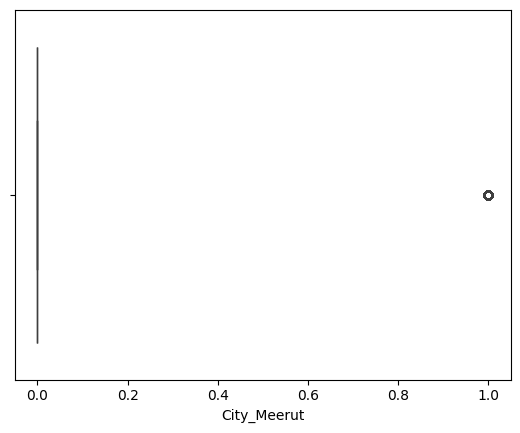

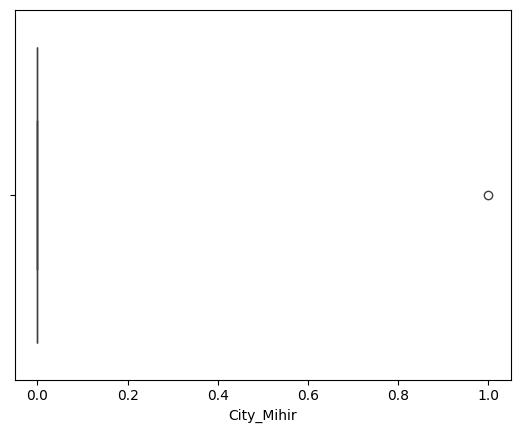

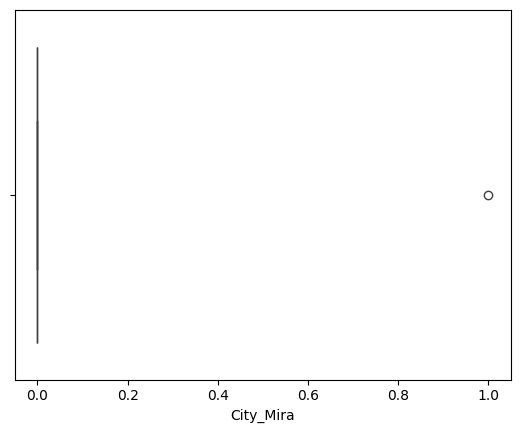

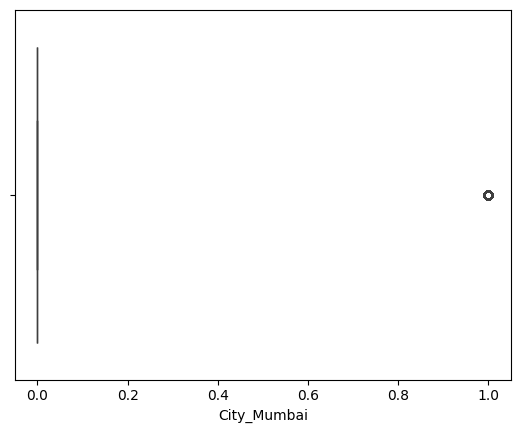

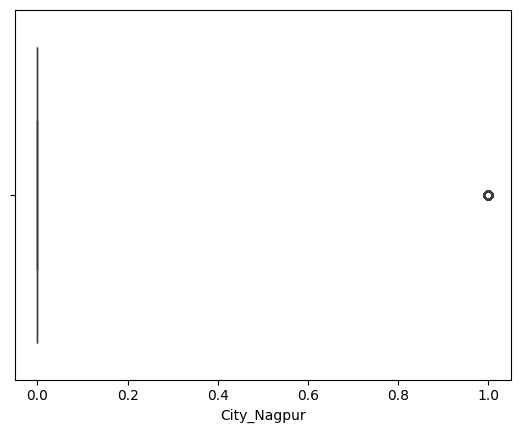

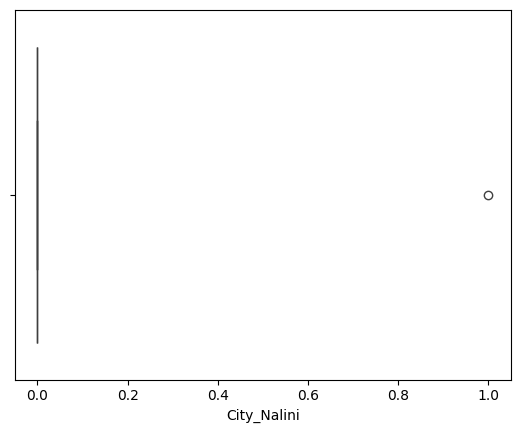

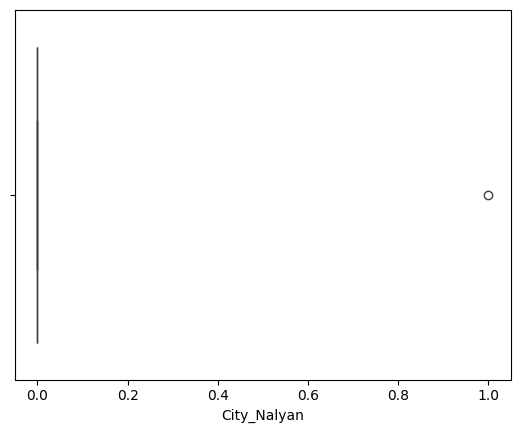

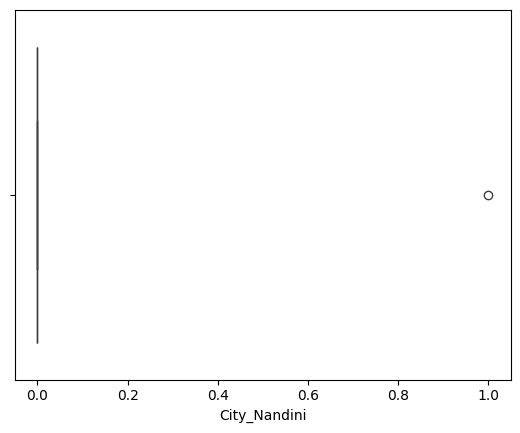

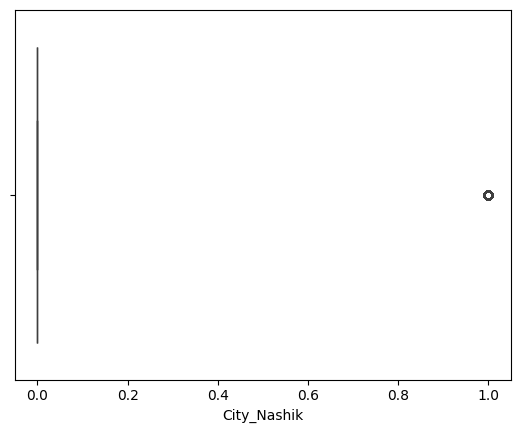

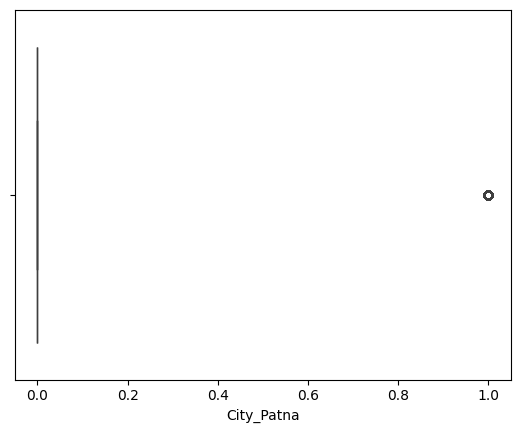

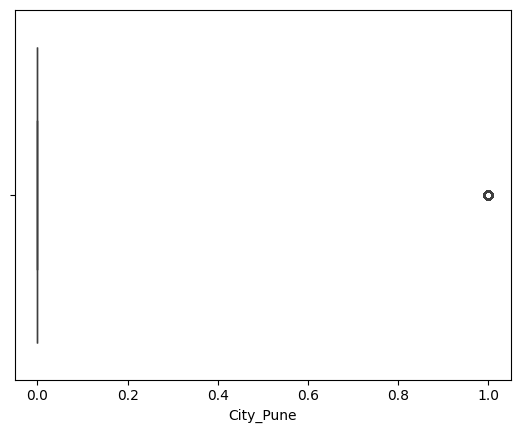

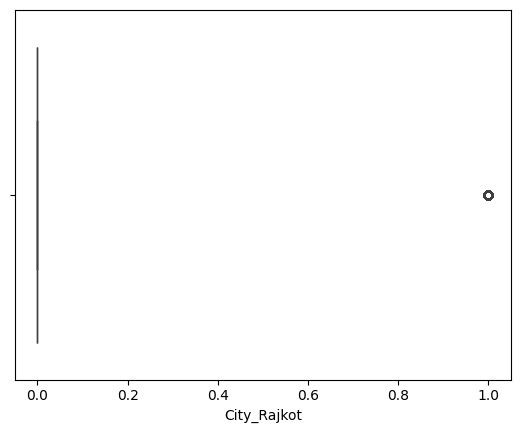

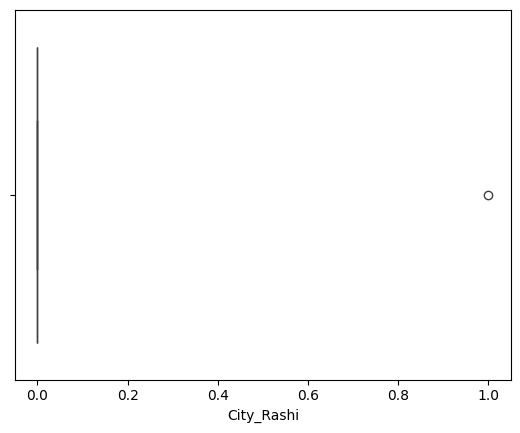

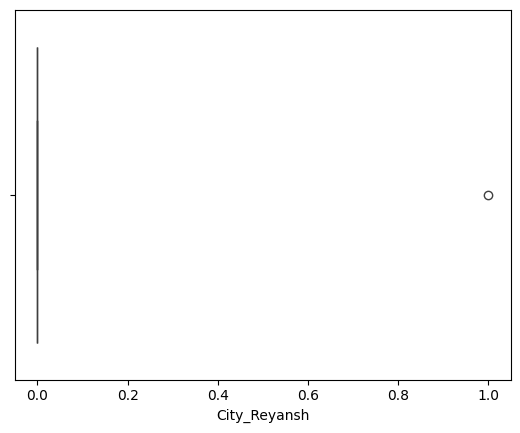

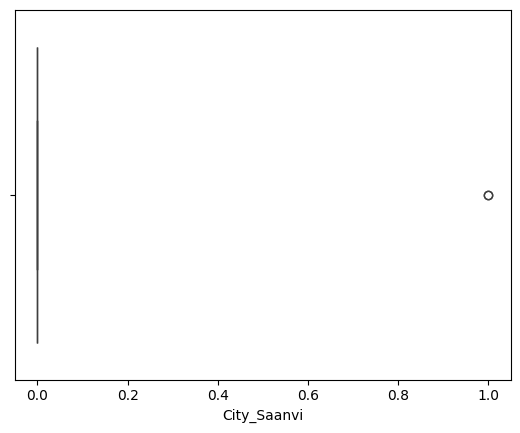

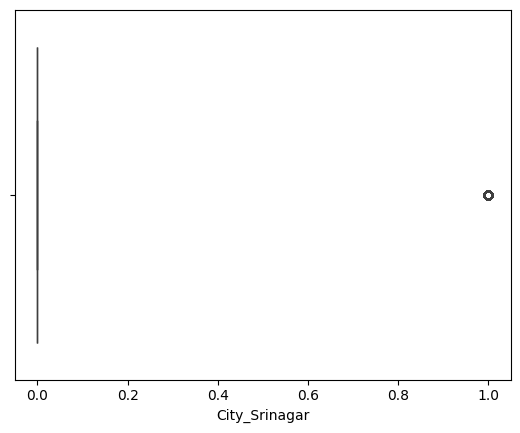

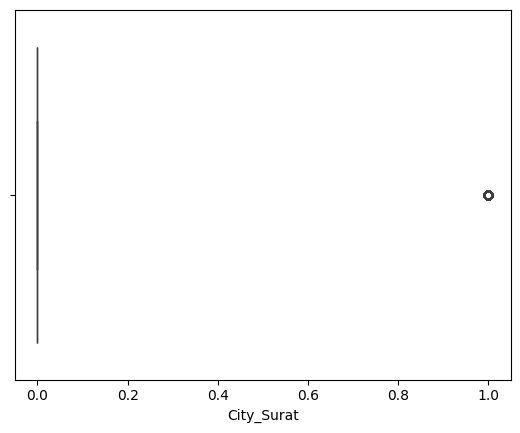

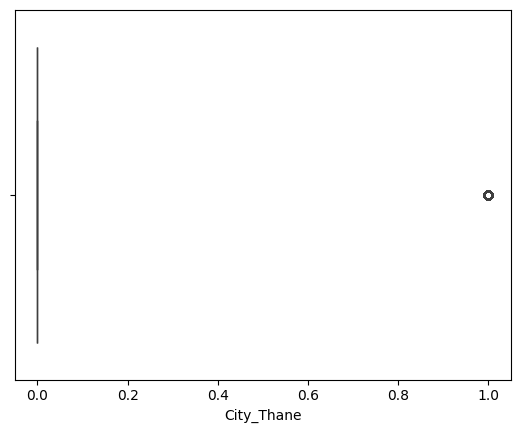

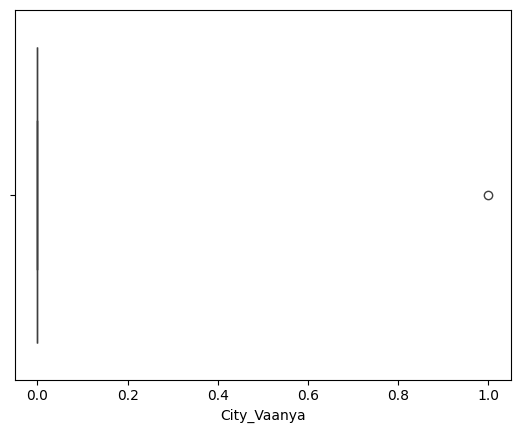

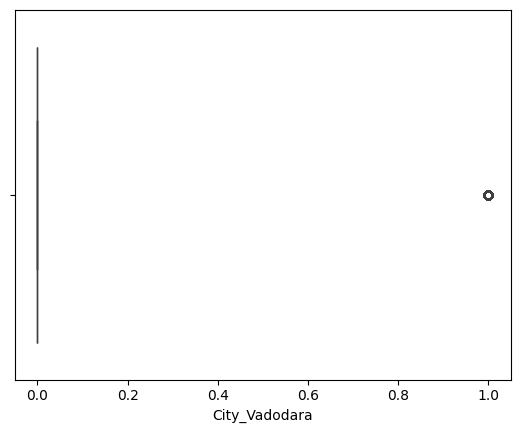

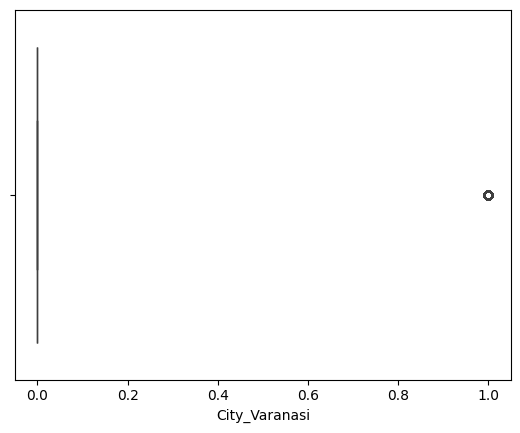

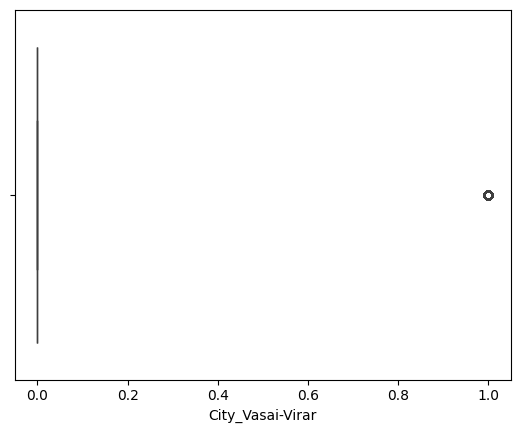

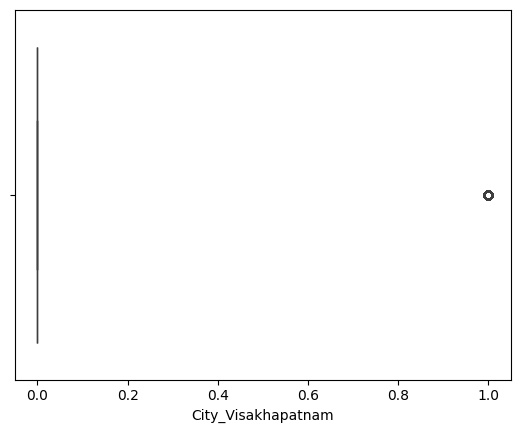

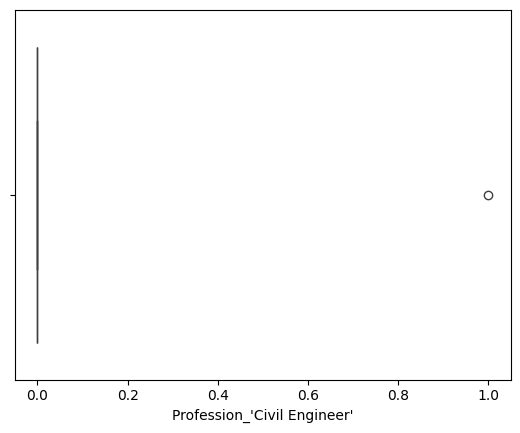

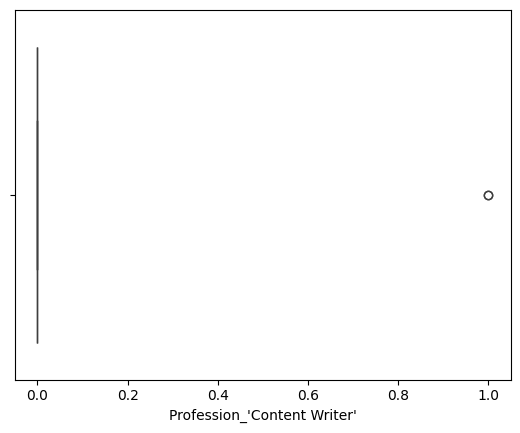

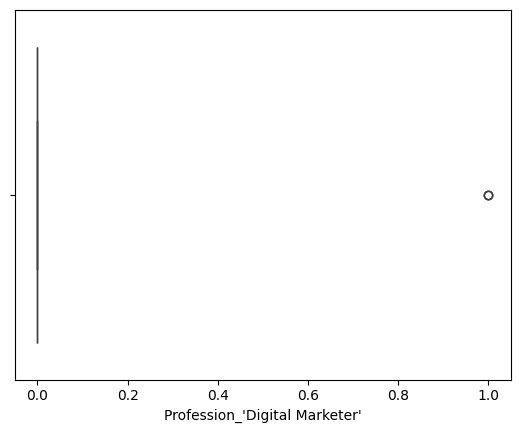

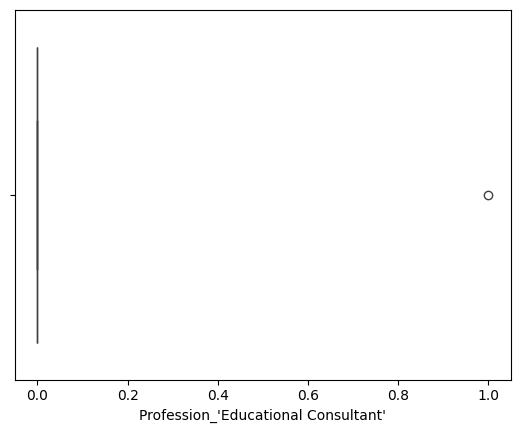

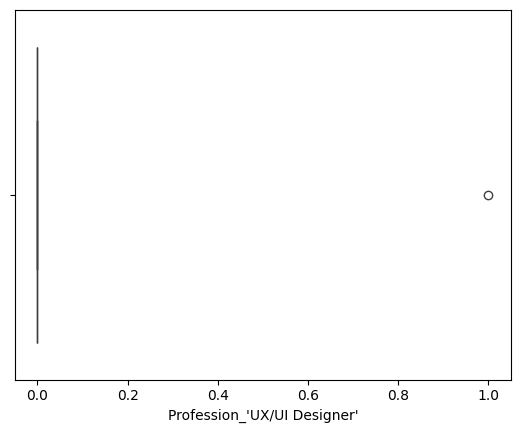

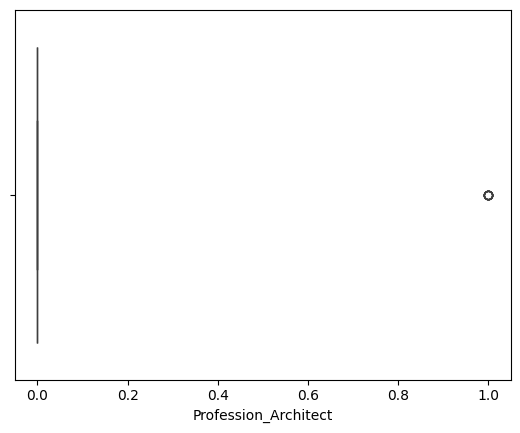

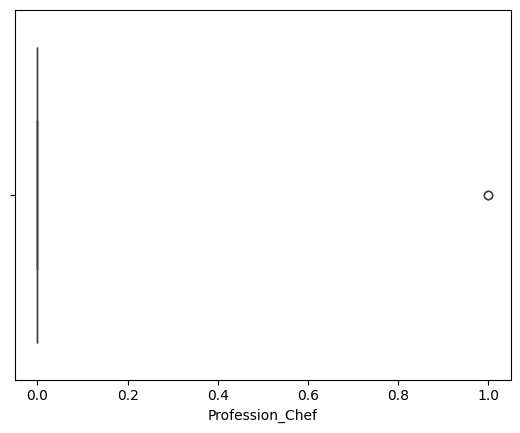

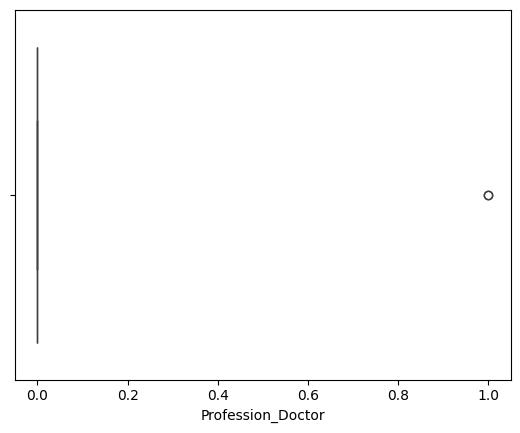

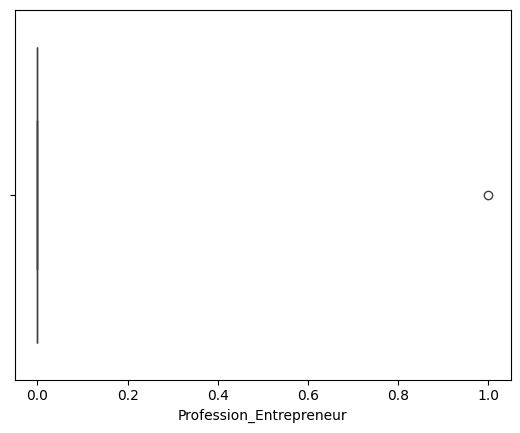

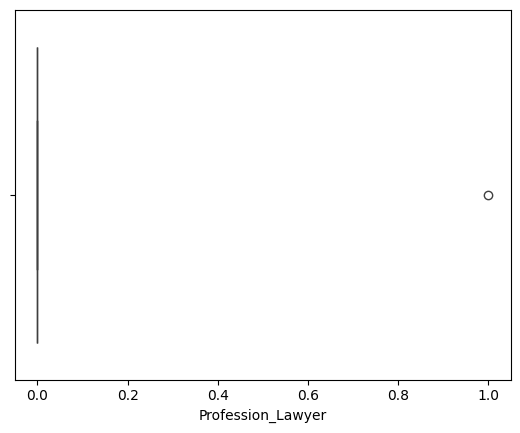

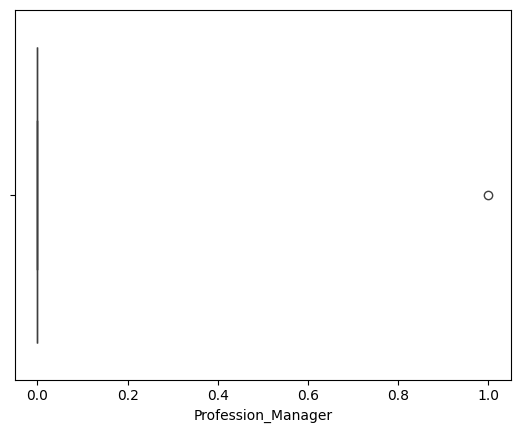

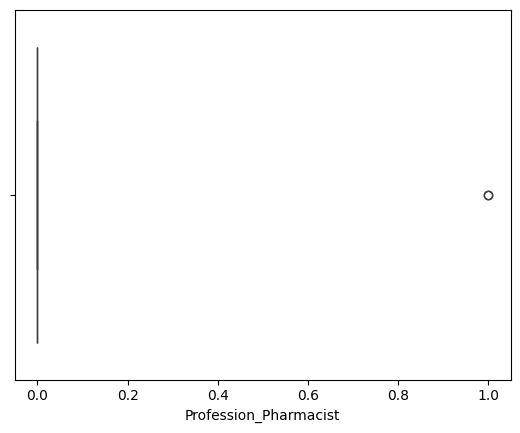

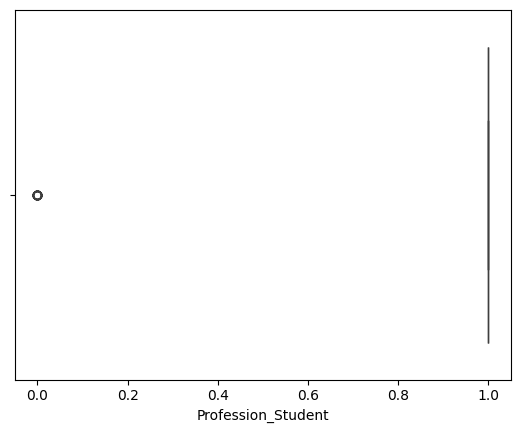

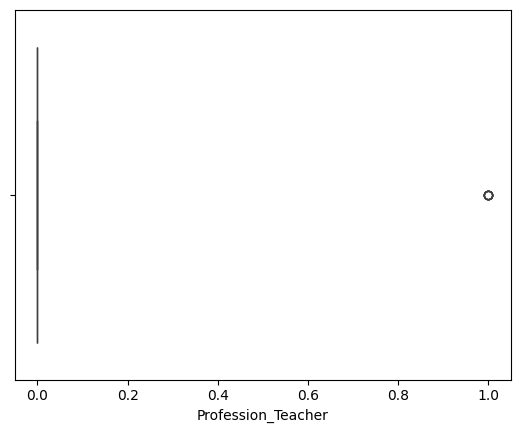

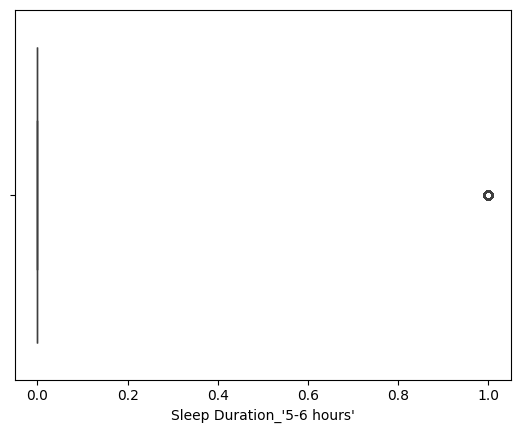

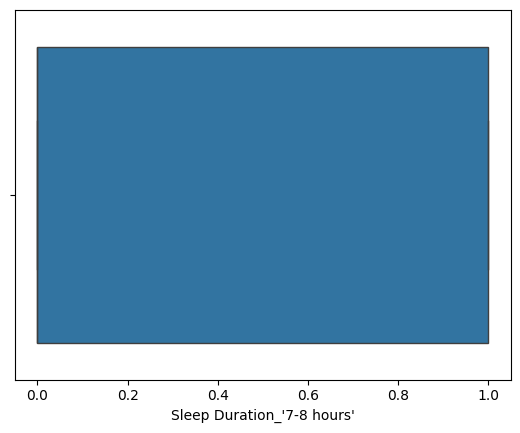

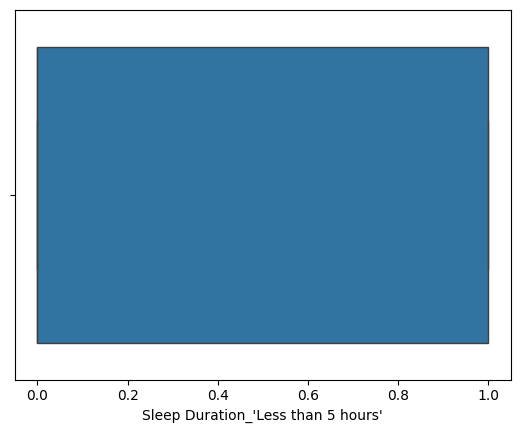

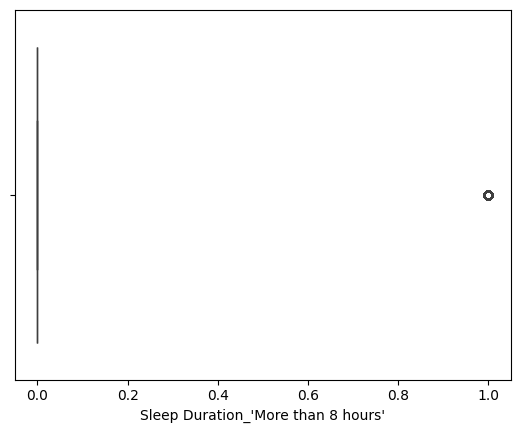

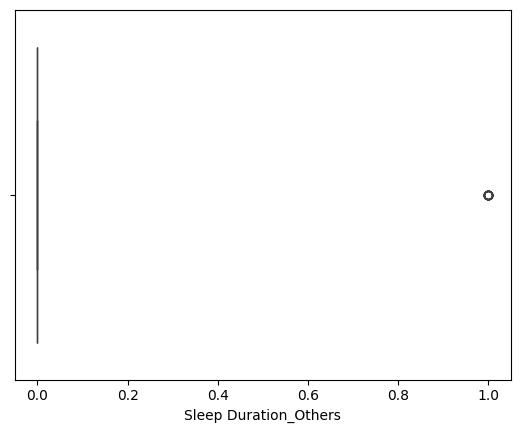

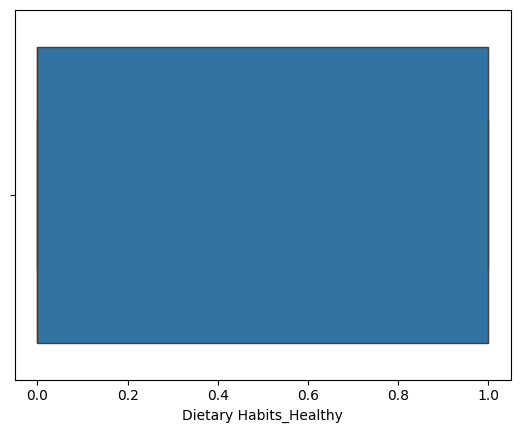

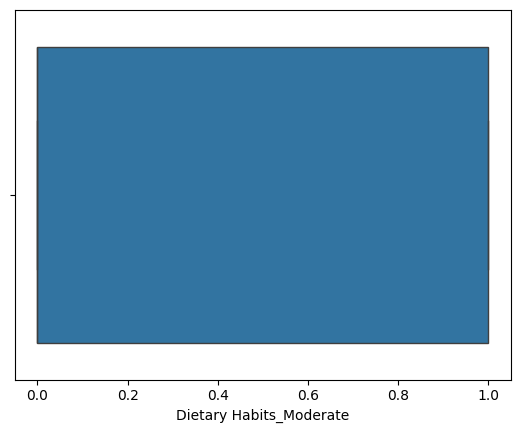

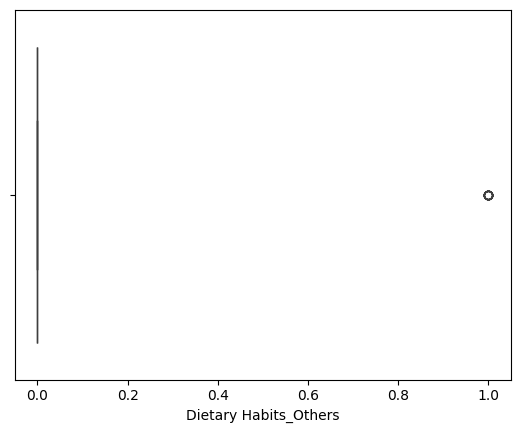

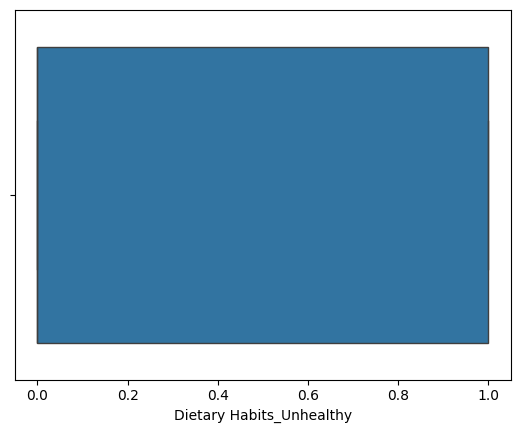

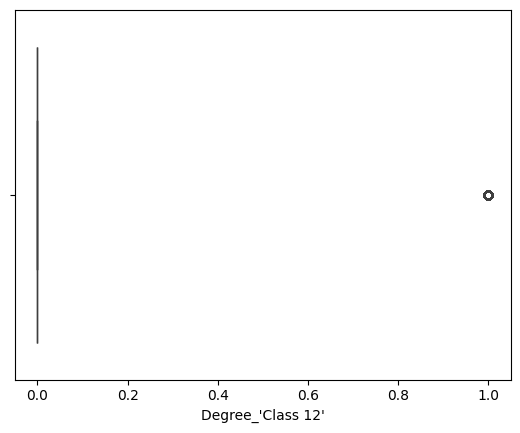

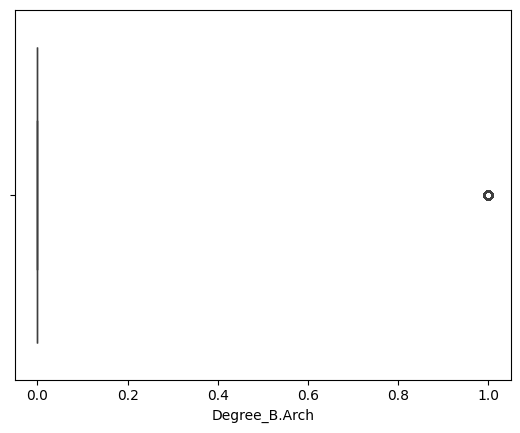

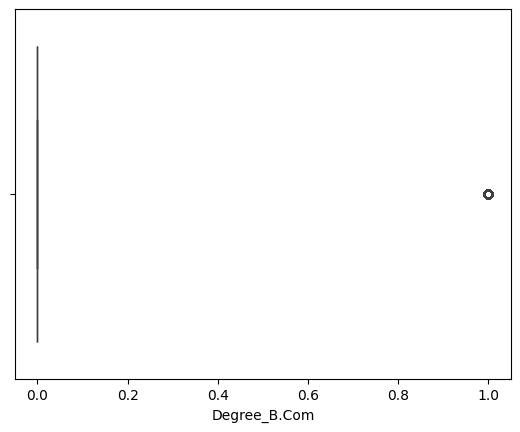

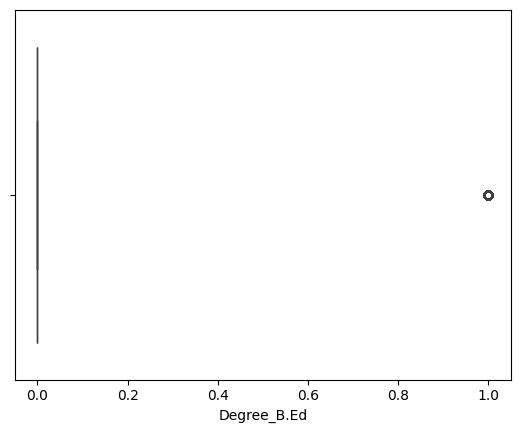

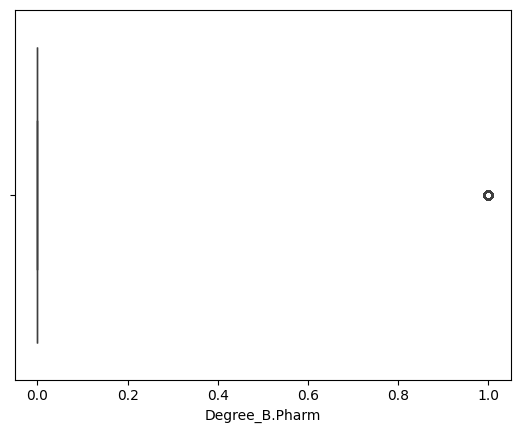

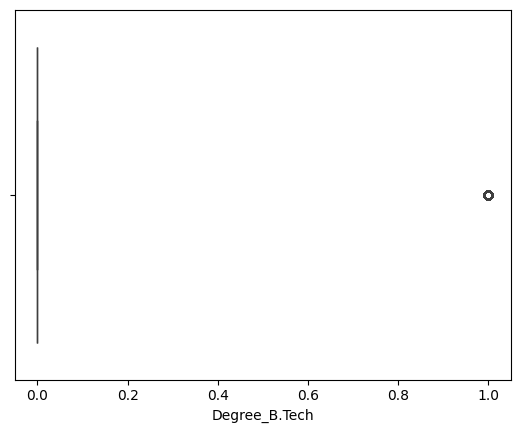

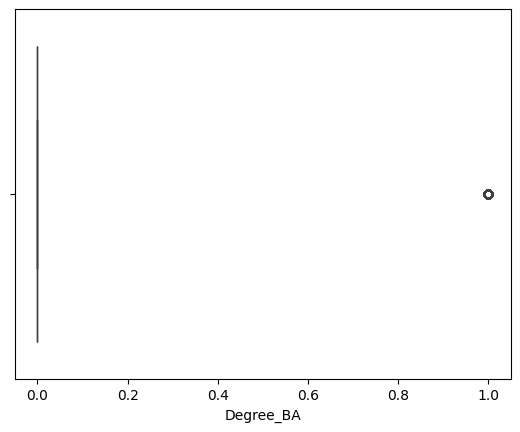

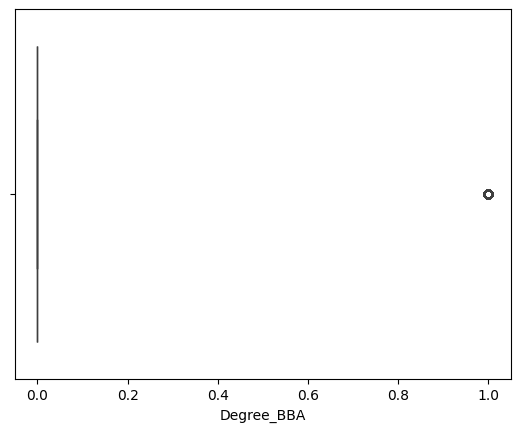

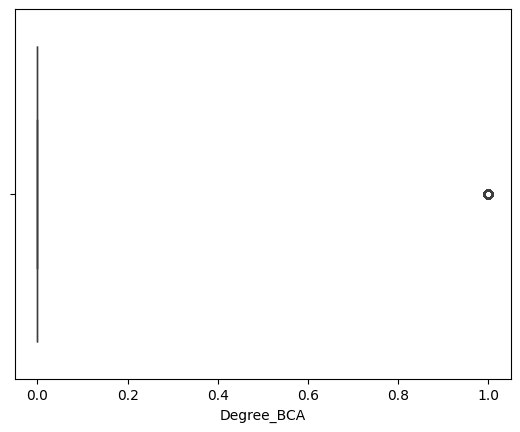

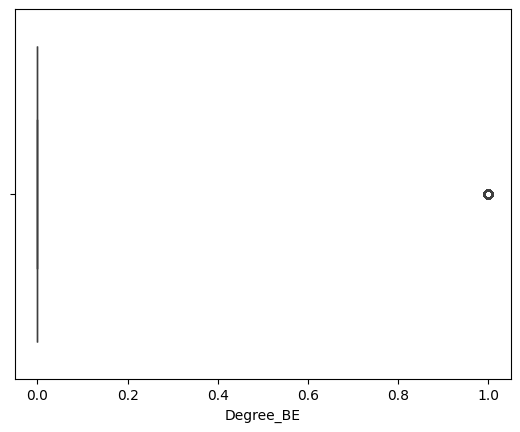

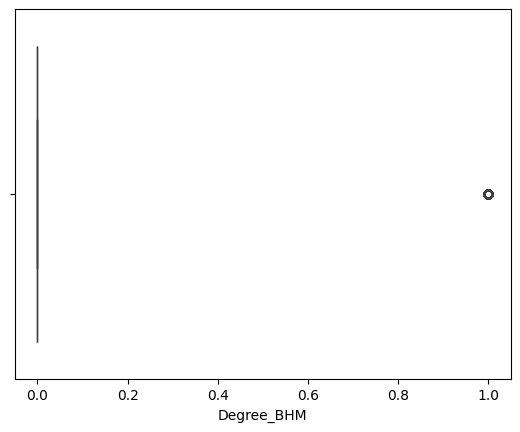

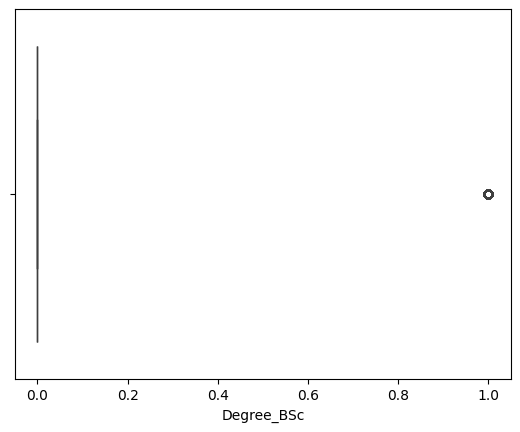

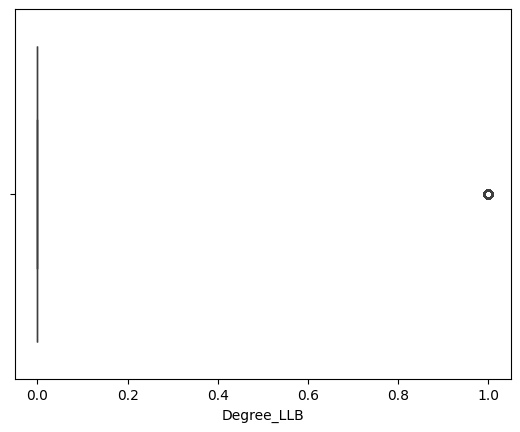

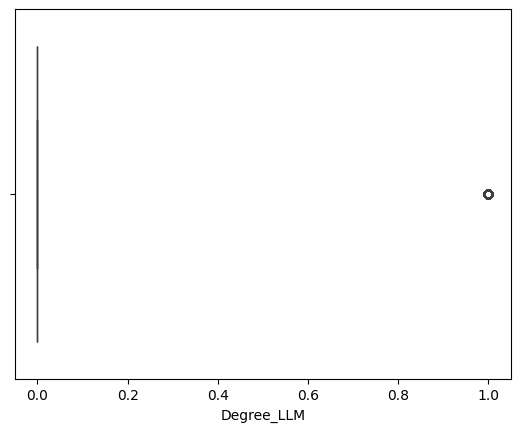

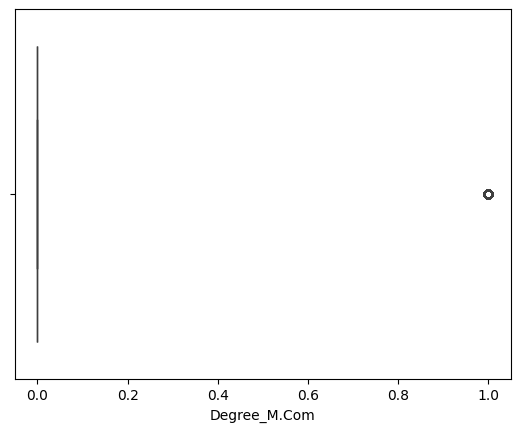

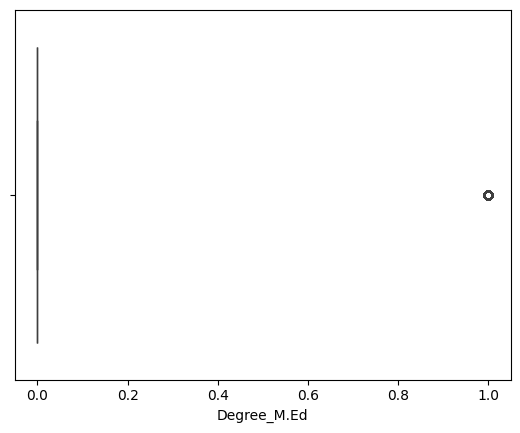

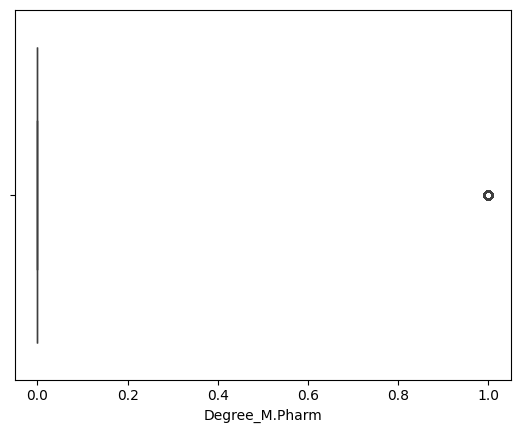

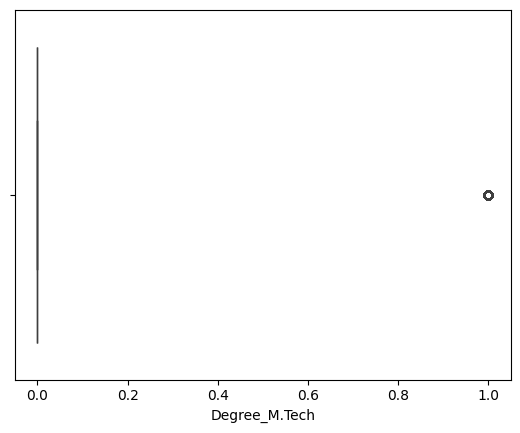

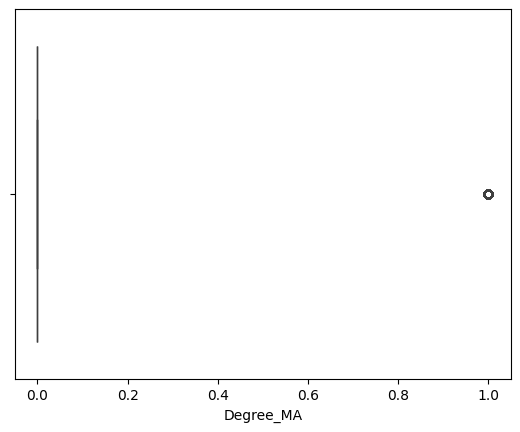

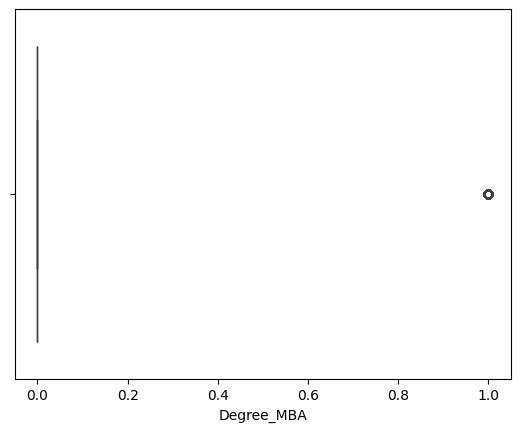

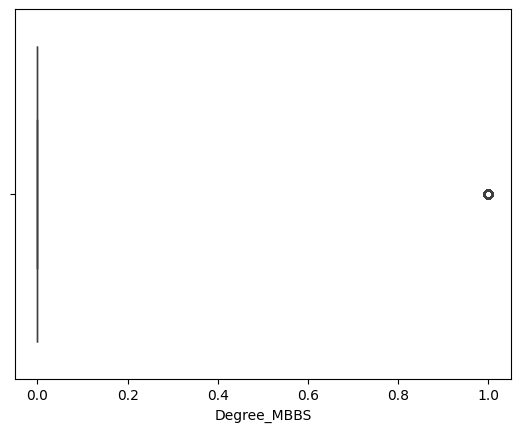

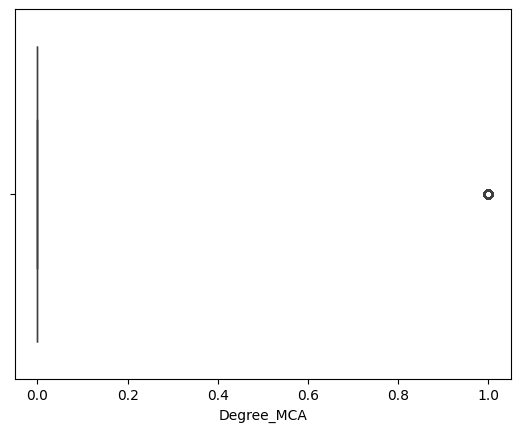

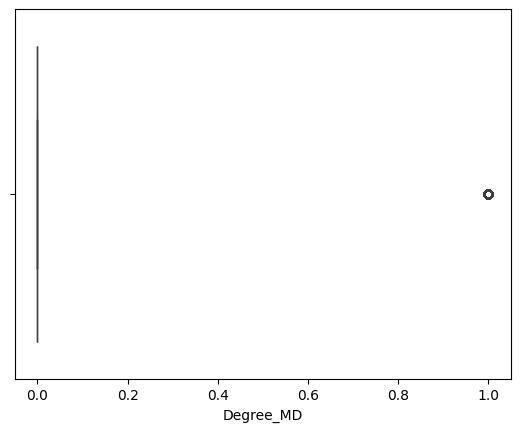

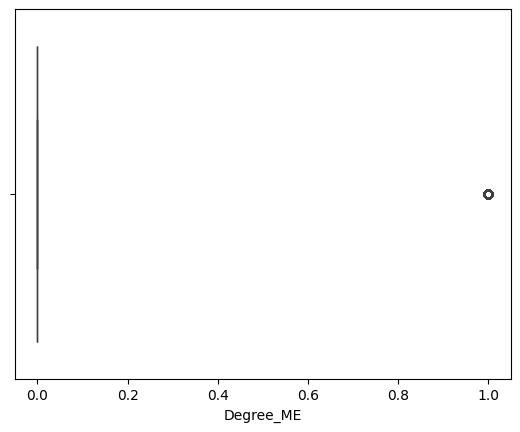

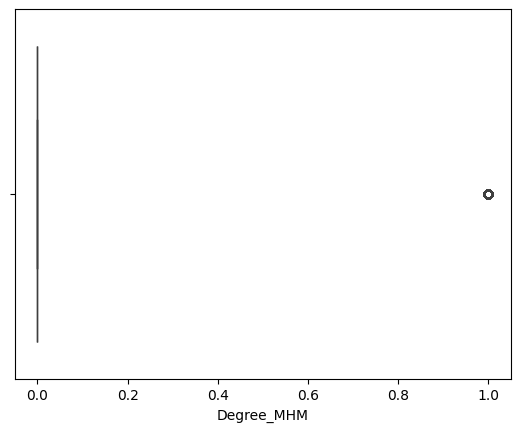

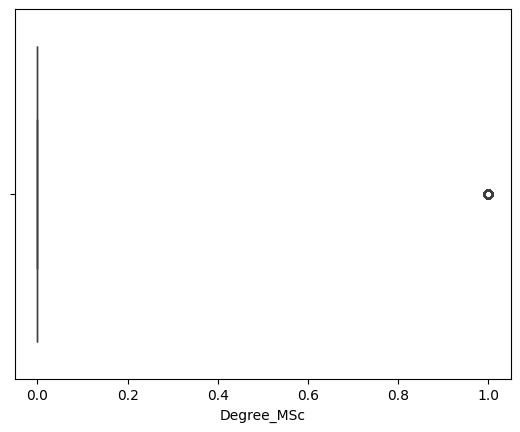

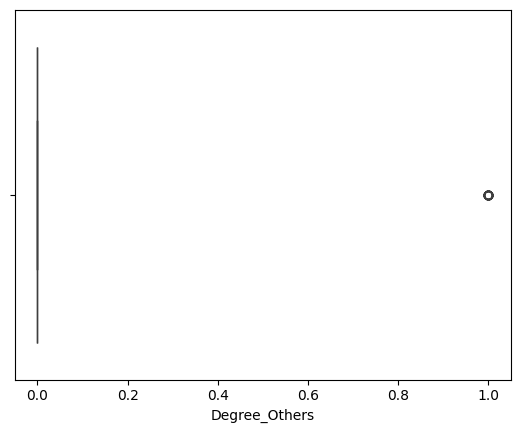

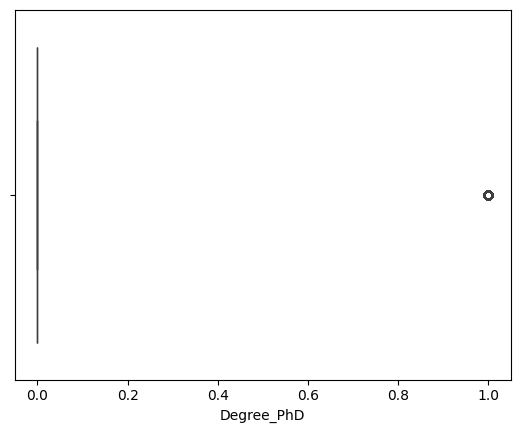

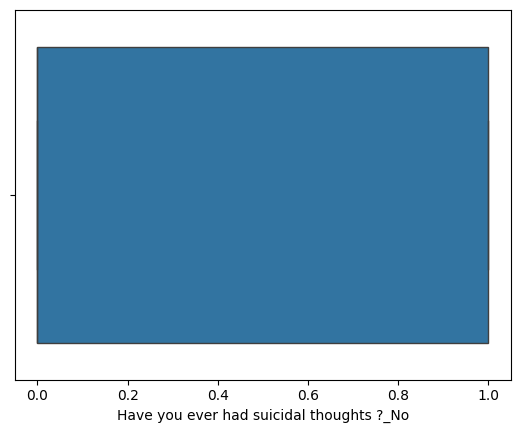

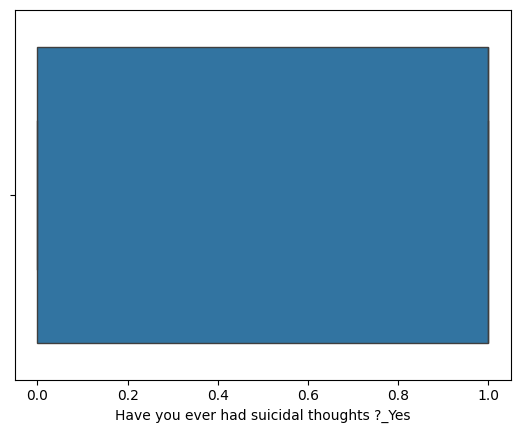

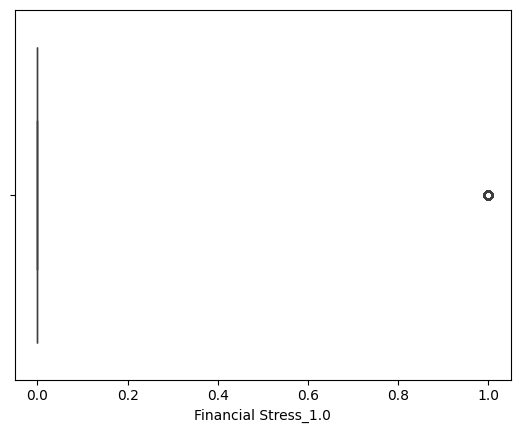

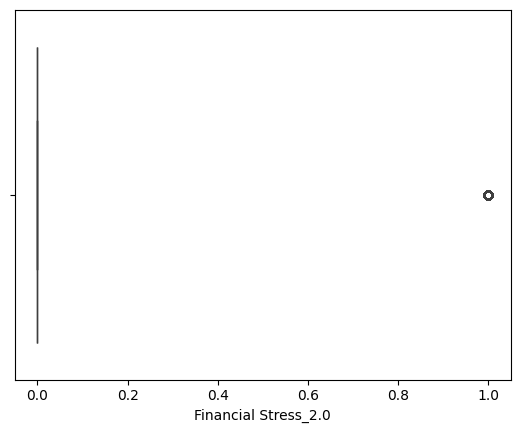

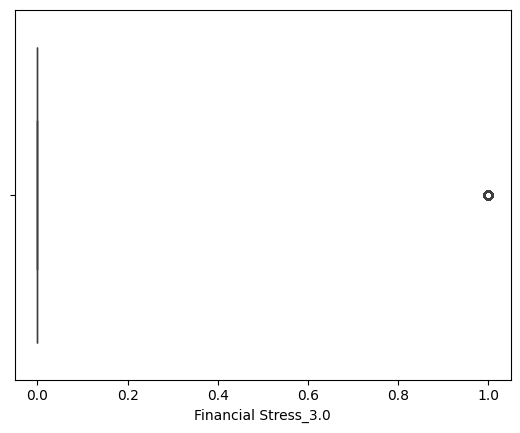

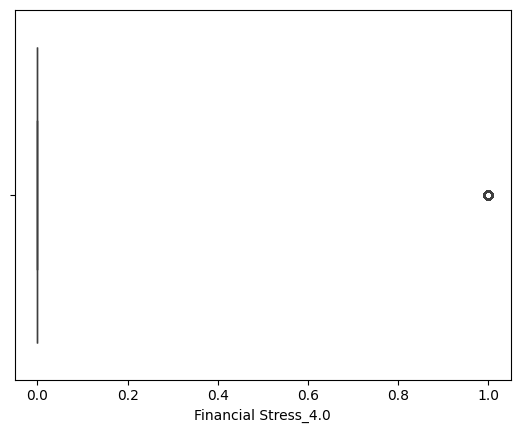

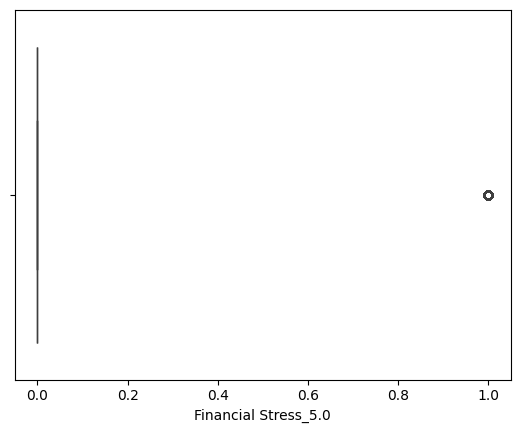

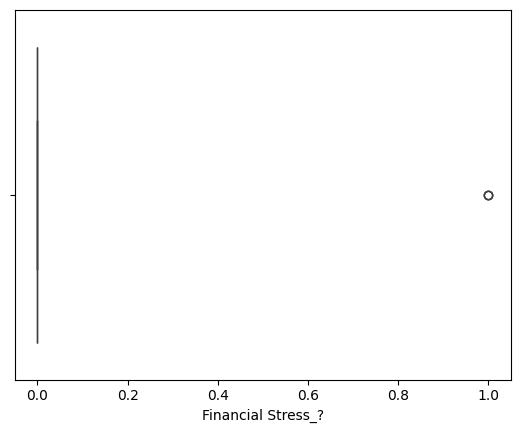

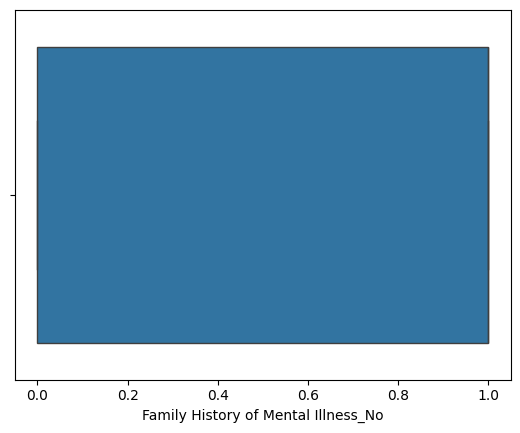

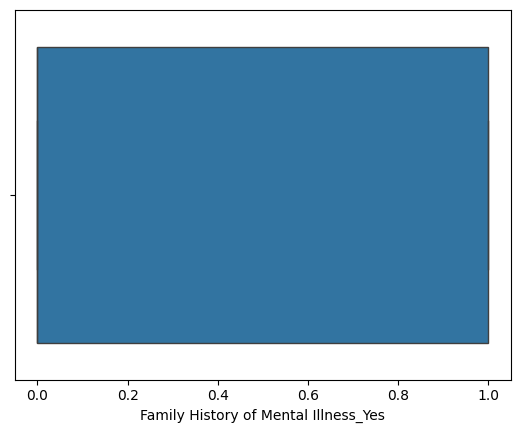

In [ ]:
for column in num_columns:
  sns.boxplot(x=df1[column])
  plt.show()

**LINE PLOT**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

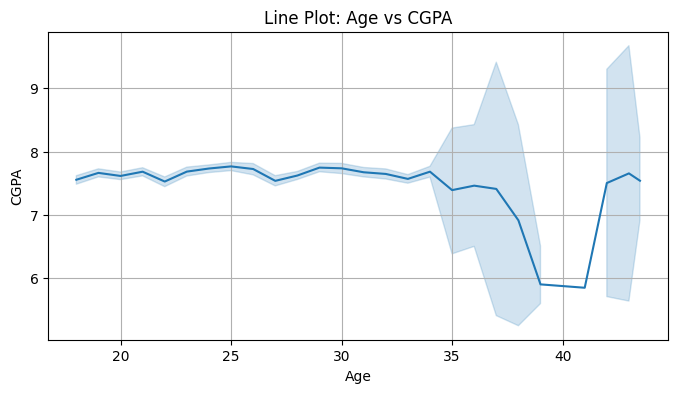

In [ ]:


df_clean= df1[['Age', 'CGPA']].dropna()
plt.figure(figsize=(8, 4))
sns.lineplot(x='Age', y='CGPA', data=df_clean)
plt.title('Line Plot: Age vs CGPA')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.grid(True)
plt

**Bar Plot**

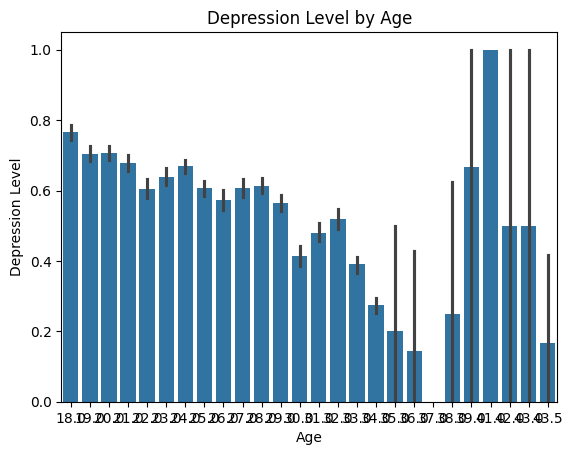

In [ ]:
#
sns.barplot(x="Age", y="Depression", data=df1)
plt.title("Depression Level by Age")
plt.xlabel("Age")
plt.ylabel("Depression Level")
plt.show()

**Histogram**

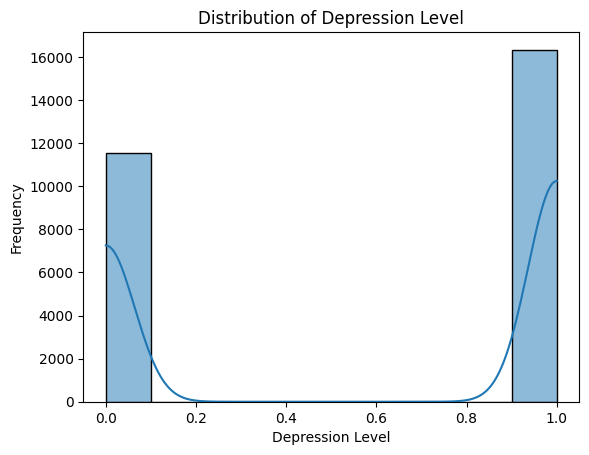

In [ ]:
# Histogram of Depression Level
sns.histplot(df1["Depression"], bins=10, kde=True)
plt.title("Distribution of Depression Level")
plt.xlabel("Depression Level")
plt.ylabel("Frequency")
plt.show()


**Scatter Plot**

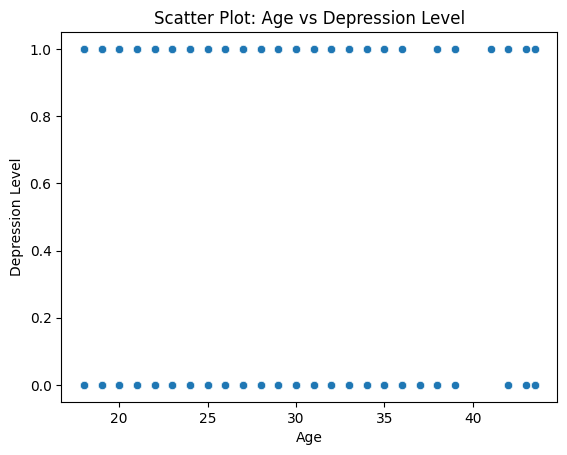

In [ ]:
#
sns.scatterplot(x="Age", y="Depression", data=df1)
plt.title("Scatter Plot: Age vs Depression Level")
plt.xlabel("Age")
plt.ylabel("Depression Level")
plt.show()

**violin plot**

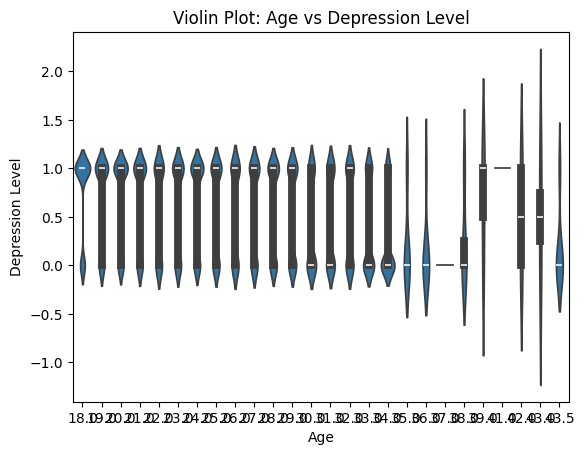

In [ ]:
#
sns.violinplot(x="Age", y="Depression", data=df1)
plt.title("Violin Plot: Age vs Depression Level")
plt.xlabel("Age")
plt.ylabel("Depression Level")
plt.show()

### **SKEW VALUE AND HANDLING**

In [ ]:
df1.skew()

,0
id,-0.005380
Age,0.093312
Academic Pressure,-0.135165
Work Pressure,0.000000
CGPA,-0.084858
...,...
Financial Stress_4.0,1.446573
Financial Stress_5.0,1.213317
Financial Stress_?,96.427865
Family History of Mental Illness_No,-0.064192


In [ ]:
print("Initial Skew:", df1['Financial Stress_?'].skew())

Initial Skew: 96.42786533914432


**COORELATION FUNCTON**

In [ ]:
#coorelation
df1.corr()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Female,...,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_No,Family History of Mental Illness_Yes
id,1.000000,0.004023,0.005172,NaN,-0.012177,0.007794,NaN,-0.004466,0.000923,0.004785,...,-0.004721,0.004721,-0.011025,0.006009,0.011630,-0.000096,-0.005910,-0.001908,0.005480,-0.005480
Age,0.004023,1.000000,-0.075864,NaN,0.004935,0.009411,NaN,-0.032746,-0.226443,-0.009294,...,0.113675,-0.113675,0.081318,0.019476,0.003579,-0.034177,-0.062130,0.002503,0.005159,-0.005159
Academic Pressure,0.005172,-0.075864,1.000000,NaN,-0.023088,-0.110988,NaN,0.095970,0.474835,0.022222,...,-0.261510,0.261510,-0.109389,-0.055121,0.000400,0.036854,0.113658,-0.008567,-0.030069,0.030069
Work Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,-0.012177,0.004935,-0.023088,NaN,1.000000,-0.044898,NaN,0.002666,0.022113,-0.036235,...,-0.008568,0.008568,-0.000170,-0.008455,-0.004681,0.012372,0.000412,-0.003676,0.003916,-0.003916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Financial Stress_4.0,-0.000096,-0.034177,0.036854,NaN,0.012372,-0.014017,NaN,0.016259,0.109316,-0.003750,...,-0.066532,0.066532,-0.242228,-0.240489,-0.245265,1.000000,-0.287623,-0.005298,-0.014361,0.014361
Financial Stress_5.0,-0.005910,-0.062130,0.113658,NaN,0.000412,-0.038120,NaN,0.054472,0.259769,0.009745,...,-0.145176,0.145176,-0.266931,-0.265014,-0.270277,-0.287623,1.000000,-0.005838,-0.005067,0.005067
Financial Stress_?,-0.001908,0.002503,-0.008567,NaN,-0.003676,-0.009730,NaN,0.010749,-0.005308,0.004674,...,0.013613,-0.013613,-0.004917,-0.004881,-0.004978,-0.005298,-0.005838,1.000000,-0.003791,0.003791
Family History of Mental Illness_No,0.005480,0.005159,-0.030069,NaN,0.003916,0.003880,NaN,-0.017434,-0.053430,-0.015759,...,0.026213,-0.026213,-0.012160,0.029840,0.003158,-0.014361,-0.005067,-0.003791,1.000000,-1.000000


**Heatmap**

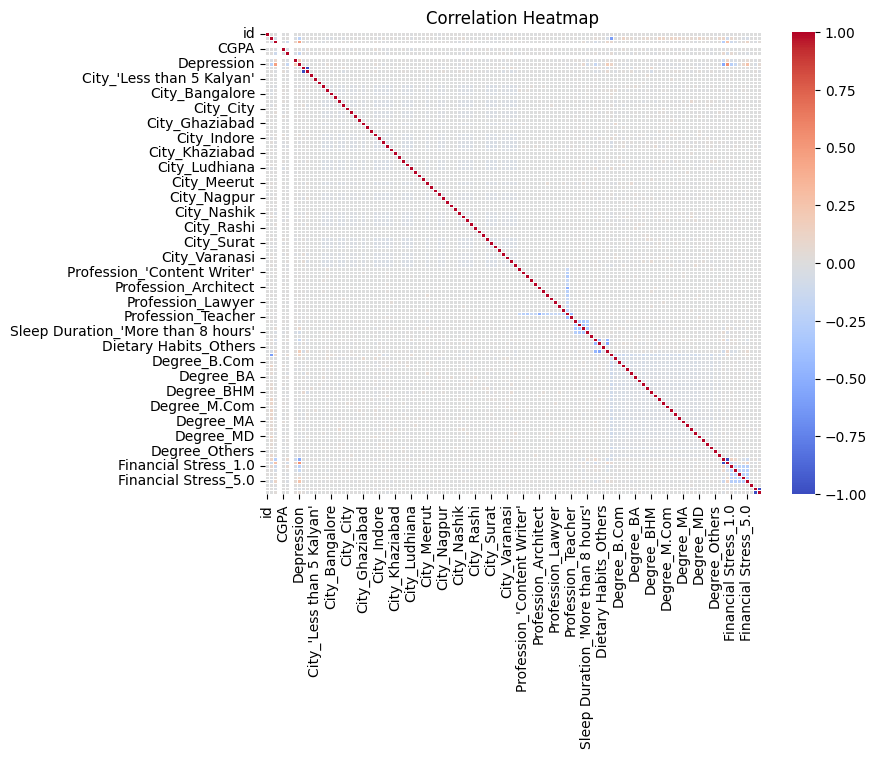

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **FEATURE SELECTION**

In [ ]:
#feature selection
x=df1.drop('Depression',axis=1)
y=df1['Depression']

In [ ]:
selector = SelectKBest(score_func=f_classif, k=15)

In [ ]:
x_new=selector.fit_transform(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
selected_features=x.columns[selector.get_support()]

In [ ]:
feature_score=pd.DataFrame({'Feature':x.columns,'Score':selector.scores_})

In [ ]:
sorted_features=feature_score.sort_values(by='Score',ascending=False)

In [ ]:
print(sorted_features)

                                       Feature         Score
113   Have you ever had suicidal thoughts ?_No  11866.855671
114  Have you ever had suicidal thoughts ?_Yes  11866.855671
2                            Academic Pressure   8121.471807
119                       Financial Stress_5.0   2018.862972
115                       Financial Stress_1.0   1969.568108
..                                         ...           ...
0                                           id      0.023775
21                              City_Faridabad      0.010700
92                                  Degree_BBA      0.001561
3                                Work Pressure           NaN
6                             Job Satisfaction           NaN

[123 rows x 2 columns]


In [ ]:
x_sorted=x[selected_features]

In [ ]:
x=x_sorted
y=df1['Depression']

## **TRAIN TEST SPLIT**

In [ ]:
#Now loading of the train and test data
x_train_selected,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **FEATURE SCALING**

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x_train_selected)

StandardScaler()

In [ ]:
#Transforming train and test data
x_test_scaled=StandardScaler().fit_transform(x_test)
x_train_selected=StandardScaler().fit_transform(x_train_selected)

In [ ]:
#Classification of algorithm call off
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'Random Forest':RandomForestClassifier()
}


## **MODEL TRAINING**

In [ ]:
#Training our data after performing scaling and feature selection
for name,clf in classifiers.items():
  clf.fit(x_train_selected,y_train)
  y_pred=clf.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## **MODEL EVALUATION**

In [ ]:
#Evaluatiion
print(f"\n({name}Results):")
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred)}")
print(f"Recall:{recall_score(y_test,y_pred)}")
print(f"F1 Score:{f1_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")


(Random ForestResults):
Accuracy:0.6839276115391507
Precision:0.6638506002667852
Recall:0.9221741815935763
F1 Score:0.7719751809720786
Confusion Matrix:
[[ 831 1512]
 [ 252 2986]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.35      0.49      2343
           1       0.66      0.92      0.77      3238

    accuracy                           0.68      5581
   macro avg       0.72      0.64      0.63      5581
weighted avg       0.71      0.68      0.65      5581



## **COCLUSION**
Using the Student Depression Dataset, we applied machine learning techniques to predict the likelihood of student depression. After preprocessing the data and applying classification models such as Logistic Regression, Decision Trees, and Random Forest, we achieved promising accuracy in identifying students at risk.